![](https://i.imgur.com/zkhjRGO.png
 "Datos")

# Análisis de propiedades de CABA y GBA publicadas en Properati entre 2013 y 2017


### 1 - Pre procesamiento:
- 1.1 - Análisis de datasets dados por properati
- 1.2 - Generación de un único dataset con más información

### 2 - Análisis por barrios
- 2.1 - Barrios de mayor precio por m2
- 2.2 - Barrios de mayor precio por propiedad (GBA y CABA)
- 2.3 - Top de propiedades más caras por barrio

### 3 - Análisis de propiedades más comunes
- 3.1 - Distribución por tipo de propiedad

### 4 - Análisis geográfico
- 4.1 - Variación del precio respecto a cercanía al Obelisco

### 5 - Análisis de puntos de interés
- 5.1 - Líneas de subte
- 5.2 - Escuelas
- 5.3 - Hospitales

### 6 - Análisis de precios vs contaminación sonora
- 6.1 - Vs promedio de decibeles por barrio

### 7- Análisis de la fluctuacion de los precios segun el piso
- 7.1 - Análisis de relación entre precio y el piso

### 8- Comparación de precio de propiedades con otras variables económicas
- 8.1 - Vs Dólar
- 8.2 - Vs Salario Mínimo
- 8.3 - Vs Inflación del Peso



In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import timedelta, date
import matplotlib.dates as mdates
import geopandas as gpd
import shapely
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1 - Pre procesamiento:

### 1.1 - Análisis de datasets dados por properati

Se analizan los datos provistos por Properati en el dataset de Agosto del 2017.

In [113]:
properties = pd.read_csv('data/props/properati-AR-2017-08-01-properties-sell.csv')

IOError: File data/props/properati-AR-2017-08-01-properties-sell.csv does not exist

#### Eliminamos duplicados y datos sin precio por metro cuadrado

In [35]:
properties.drop_duplicates(inplace=True)
properties.dropna(subset=['price_usd_per_m2'], inplace=True)

#### Contamos los datos por año

In [36]:
def showCountPerYear(dataframe):
    quantityPerYear = {'2013':len(dataframe.loc[dataframe.created_on.str.contains('2013'), :])\
                            ,'2014': len(dataframe.loc[dataframe.created_on.str.contains('2014'), :])\
                            ,'2015': len(dataframe.loc[dataframe.created_on.str.contains('2015'), :])\
                            ,'2016': len(dataframe.loc[dataframe.created_on.str.contains('2016'), :])\
                            ,'2017': len(dataframe.loc[dataframe.created_on.str.contains('2017'), :])}
    print pd.Series(quantityPerYear)

#### Observamos que hay muy pocos datos de los primeros años, sobre todo del 2013.
Revisando los datos en el último conjunto provisto (Agosto 2017) se especula con la posibilidad de que sólo se tomen las publicaciones activas a la hora de crear el dataset.
Por esto, se vas a analizar los demás sets de datos provistos por properati, con el objetivo de tener más información sobre esos años.

In [37]:
dfAgosto2013 = pd.read_csv('data/props/2013/properati-AR-2013-08-01-properties-sell.csv')
dfSept2013 = pd.read_csv('data/props/2013/properati-AR-2013-09-01-properties-sell.csv')
dfOct2013 = pd.read_csv('data/props/2013/properati-AR-2013-10-01-properties-sell.csv')
dfNov2013 = pd.read_csv('data/props/2013/properati-AR-2013-11-01-properties-sell.csv')
dfDic2013 = pd.read_csv('data/props/2013/properati-AR-2013-12-01-properties-sell.csv')

dfEnero2014 = pd.read_csv('data/props/2014/properati-AR-2014-01-01-properties-sell.csv')
dfFeb2014 = pd.read_csv('data/props/2014/properati-AR-2014-02-01-properties-sell.csv')
dfMar2014 = pd.read_csv('data/props/2014/properati-AR-2014-03-01-properties-sell.csv')
dfAbril2014 = pd.read_csv('data/props/2014/properati-AR-2014-04-01-properties-sell.csv')
dfMayo2014 = pd.read_csv('data/props/2014/properati-AR-2014-05-01-properties-sell.csv')
dfJun2014 = pd.read_csv('data/props/2014/properati-AR-2014-06-01-properties-sell.csv')
dfJul2014 = pd.read_csv('data/props/2014/properati-AR-2014-07-01-properties-sell.csv')
dfAgo2014 = pd.read_csv('data/props/2014/properati-AR-2014-08-01-properties-sell.csv')
dfSept2014 = pd.read_csv('data/props/2014/properati-AR-2014-09-01-properties-sell.csv')
dfOct2014 = pd.read_csv('data/props/2014/properati-AR-2014-10-01-properties-sell.csv')
dfNov2014 = pd.read_csv('data/props/2014/properati-AR-2014-11-01-properties-sell.csv')
dfDic2014 = pd.read_csv('data/props/2014/properati-AR-2014-12-01-properties-sell.csv')

dfEnero2015 = pd.read_csv('data/props/2015/properati-AR-2015-01-01-properties-sell.csv')
dfFeb2015 = pd.read_csv('data/props/2015/properati-AR-2015-02-01-properties-sell.csv')
dfMar2015 = pd.read_csv('data/props/2015/properati-AR-2015-03-01-properties-sell.csv')
dfAbril2015 = pd.read_csv('data/props/2015/properati-AR-2015-04-01-properties-sell.csv')
dfMayo2015 = pd.read_csv('data/props/2015/properati-AR-2015-05-01-properties-sell.csv')
dfJul2015 = pd.read_csv('data/props/2015/properati-AR-2015-07-01-properties-sell.csv')
dfAgo2015 = pd.read_csv('data/props/2015/properati-AR-2015-08-01-properties-sell.csv')
dfSept2015 = pd.read_csv('data/props/2015/properati-AR-2015-09-01-properties-sell.csv')
dfOct2015 = pd.read_csv('data/props/2015/properati-AR-2015-10-01-properties-sell.csv')
dfNov2015 = pd.read_csv('data/props/2015/properati-AR-2015-11-01-properties-sell.csv')
dfDic2015 = pd.read_csv('data/props/2015/properati-AR-2015-12-01-properties-sell.csv')

dfEnero2016 = pd.read_csv('data/props/2016/properati-AR-2016-01-01-properties-sell.csv')
dfFeb2016 = pd.read_csv('data/props/2016/properati-AR-2016-02-01-properties-sell.csv')
dfMar2016 = pd.read_csv('data/props/2016/properati-AR-2016-03-01-properties-sell.csv')
dfAbril2016 = pd.read_csv('data/props/2016/properati-AR-2016-04-01-properties-sell.csv')
dfMayo2016 = pd.read_csv('data/props/2016/properati-AR-2016-05-01-properties-sell.csv')
dfJun2016 = pd.read_csv('data/props/2016/properati-AR-2016-06-01-properties-sell.csv')
dfJul2016 = pd.read_csv('data/props/2016/properati-AR-2016-07-01-properties-sell.csv')
dfAgo2016 = pd.read_csv('data/props/2016/properati-AR-2016-08-01-properties-sell.csv')
dfSept2016 = pd.read_csv('data/props/2016/properati-AR-2016-09-01-properties-sell.csv')
dfOct2016 = pd.read_csv('data/props/2016/properati-AR-2016-10-01-properties-sell.csv')
dfNov2016 = pd.read_csv('data/props/2016/properati-AR-2016-11-01-properties-sell.csv')
dfDic2016 = pd.read_csv('data/props/2016/properati-AR-2016-12-01-properties-sell.csv')

dfEnero2017 = pd.read_csv('data/props/2017/properati-AR-2017-01-01-properties-sell.csv')
dfAgostoSixMonths2017 = pd.read_csv('data/props/2017/properati-AR-2017-08-01-properties-sell-six_months.csv')

properties = pd.concat([dfAgosto2013,dfSept2013,dfOct2013,dfNov2013,dfDic2013,dfEnero2014,dfFeb2014,dfMar2014, dfAbril2014,dfMayo2014,dfJun2014,dfJul2014,dfAgo2014,dfSept2014,dfOct2014,dfNov2014,dfDic2014,dfEnero2015, dfFeb2015, dfMar2015, dfAbril2015, dfMayo2015,dfJul2015,dfAgo2015,dfSept2015,dfOct2015, dfNov2015, dfDic2015,dfEnero2016,dfFeb2016,dfMar2016, dfAbril2016,dfMayo2016,dfJun2016,dfJul2016, dfAgo2016, dfSept2016,dfOct2016, dfNov2016, dfDic2016,dfEnero2017,dfAgostoSixMonths2017])

IOError: File data/props/2013/properati-AR-2013-08-01-properties-sell.csv does not exist

### 1.2 - Generación de un dataset con más información

In [38]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493836 entries, 0 to 493835
Data columns (total 30 columns):
Unnamed: 0                    493836 non-null int64
country_name                  133116 non-null object
created_on                    493836 non-null object
currency                      493729 non-null object
description                   285108 non-null object
expenses                      31115 non-null object
extra                         151994 non-null object
floor                         79459 non-null float64
geonames_id                   420180 non-null float64
id                            133116 non-null object
image_thumbnail               479744 non-null object
lat                           383713 non-null float64
lat-lon                       383713 non-null object
lon                           383710 non-null float64
operation                     493836 non-null object
place_name                    493797 non-null object
place_with_parent_names       493836 non

In [8]:
len(properties)

NameError: name 'properties' is not defined

#### Se eliminan duplicados

In [9]:
properties.drop_duplicates(inplace=True)

NameError: name 'properties' is not defined

In [10]:
showCountPerYear(properties)

NameError: name 'properties' is not defined

In [11]:
len(properties)

NameError: name 'properties' is not defined

#### Se eliminan los que no tengan precio por metro cuadrado, se guardan los demás para posible recuperación de esa información

In [13]:
propertiesWithoutM2Price = properties[pd.isnull(properties['price_usd_per_m2'])]

In [14]:
properties.dropna(subset=['price_usd_per_m2'], inplace=True)

In [15]:
recoverablePropertiesData = propertiesWithoutM2Price[pd.notnull(propertiesWithoutM2Price['surface_covered_in_m2']) & pd.notnull(propertiesWithoutM2Price['price_aprox_usd']) & pd.notnull(propertiesWithoutM2Price['price'])]

In [16]:
len(recoverablePropertiesData.loc[recoverablePropertiesData.created_on.str.contains('2013'), :])

642

In [17]:
len(properties.loc[properties.created_on.str.contains('2013'), :])

397179

Se desestiman los datos que podrían recuperarse calculando el precio por metro cuadrado, al ser muchos menos que los que lo tienen directamente.

#### Checkpoint para analizar del estado de los datos por año

In [18]:
showCountPerYear(properties)

2013    397179
2014    380698
2015    327666
2016     59761
2017     75953
dtype: int64


Se ve que los años 2013, 2014 y 2015 cuentan con muchos más datos que los años más recientes. Se analiza por qué.

#### Analizo propiedades que compartan ciertas características, que den a sospechar una re-publicación, lo cual alteraría el análisis teniendo en cuenta una propiedad más de una vez.

In [20]:
republishedCandidates = properties[properties.duplicated(subset=['title','property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name', 'expenses'])]
showCountPerYear(republishedCandidates)

2013    268796
2014    252634
2015    139518
2016      2557
2017      4620
dtype: int64


#### Se aprecia que en los años donde había demasiados más datos, encontramos muchas potenciales re-publicaciones.
Se borran las mismas.

In [21]:
properties.drop_duplicates(subset=['title','property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name', 'expenses'], inplace=True)

In [22]:
showCountPerYear(properties)

2013    128383
2014    128064
2015    188148
2016     57204
2017     71333
dtype: int64


#### Vemos que sigue habiendo mucha diferencia, aunque se redujo notablemente. Hilamos más fino.

In [23]:
republishedCandidates = properties[properties.duplicated(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'])]
showCountPerYear(republishedCandidates)

2013     4186
2014    19420
2015    53629
2016     2737
2017     5644
dtype: int64


#### Tomamos una muestra para ver si este filtro es excesivo

In [24]:
republishedCandidates = properties[properties.duplicated(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'])]

In [25]:
republishedCandidates.groupby(['property_type', 'rooms', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id']).count()

country_name  \
property_type rooms surface_in_m2 price     price_aprox_usd price_usd_per_m2 geonames_id                 
PH            1.0   19.0          35000.0   35000.00        1842.105263      3430863.0               0   
                    20.0          26000.0   26000.00        1300.000000      3430863.0               0   
                                  27000.0   27000.00        1350.000000      3428123.0               0   
                    23.0          50000.0   50000.00        2173.913043      3430116.0               0   
                    24.0          49000.0   49000.00        2041.666667      3430114.0               0   
                    25.0          50000.0   50000.00        2000.000000      3430116.0               0   
                                  70000.0   70000.00        2800.000000      3435506.0               0   
                    26.0          50000.0   50000.00        1923.076923      3430863.0               0   
                                  50500.0   50500.00        1942.307692      3430863.0               0   
                    27.0          55000.0   55000.00        2037.037037      3430116.0               0   
                    28.0          49500.0   49500.00        1767.857143      3430863.0               0   
                                  50500.0   50500.00        1803.571429      3430863.0               0   
                                  51000.0   51000.00        1821.428571      3430863.0               0   
                    30.0          25000.0   25000.00        833.333333       3430863.0               0   
                                  38000.0   38000.00        1266.666667      3433778.0               0   
                                  45000.0   45000.00        1500.000000      3430863.0               0   
                                  47000.0   47000.00        1566.666667      3430863.0               0   
                                  48000.0   48000.00        1600.000000      3430863.0               0   
                                  49000.0   49000.00        1633.333333      3430863.0               0   
                                  50500.0   50500.00        1683.333333      3430863.0               0   
                                  51000.0   51000.00        1700.000000      3430863.0               0   
                                  52000.0   52000.00        1733.333333      3430863.0               0   
                                  53000.0   53000.00        1766.666667      3430863.0               0   
                                  60000.0   60000.00        2000.000000      3430116.0               0   
                                  65000.0   65000.00        2166.666667      3430116.0               0   
                                  70000.0   70000.00        2333.333333      3430116.0               0   
                                                                             3435506.0               0   
                                  80000.0   80000.00        2666.666667      3427407.0               0   
                    31.0          55000.0   55000.00        1774.193548      3430116.0               0   
                                                                             3430863.0               0   
...                                                                                                ...   
store         1.0   175.0         350000.0  350000.00       2000.000000      3433787.0               0   
                    180.0         250000.0  250000.00       1388.888889      6693229.0               0   
                                  450000.0  450000.00       2500.000000      3436077.0               0   
                    192.0         3500000.0 3500000.00      18229.166667     3441011.0               0   
                    265.0         290000.0  290000.00       1094.339623      3436003.0               0   
                                  320000.0  320000.00       12

In [26]:
df = republishedCandidates[(republishedCandidates['property_type'] == 'PH')\
 & (republishedCandidates['rooms'] == 1)\
 & (republishedCandidates['surface_in_m2'] == 19)]

In [27]:
df

country_name  created_on currency  \
23420          NaN  2014-06-11      USD   
79974          NaN  2015-05-14      USD   

                                             description expenses  \
23420  Excelente local independiente <br>\nA 1 cuadra...      NaN   
79974  Excelente local independiente A 1 cuadra de Av...      NaN   

                                                   extra  floor  geonames_id  \
23420  {"images":["http://www.inmokey.com/files/c-196...    NaN    3430863.0   
79974  {"address":"Calle sin nombre","original_url":"...    NaN    3430863.0   

        id                                    image_thumbnail  \
23420  NaN  http://d1t4y5hzjn9jnl.cloudfront.net/p6mteeIay...   
79974  NaN  http://thumbs3.properati.com/3/FDBjKmrvhu5waZ6...   

                             ...                          price_per_m2  \
23420                        ...                                   NaN   
79974                        ...                                   NaN   

      price_usd_per_m2                                      properati_url  \
23420      1842.105263  http://www.properati.com.ar/gir4_venta_ph_mar-...   
79974      1842.105263  http://mar-del-plata.properati.com.ar/plcb_ven...   

      property_type rooms state_name  surface_covered_in_m2  surface_in_m2  \
23420            PH   1.0        NaN                    NaN           19.0   
79974            PH   1.0        NaN                    NaN           19.0   

       surface_total_in_m2                                              title  
23420                  NaN  PH en Venta. 1 Ambiente. 19 m2. 19 m2c. Local ...  
79974                  NaN  Local independiente ESPAÑA y FALUCHO. 1 Ambien...  

[2 rows x 29 columns]

In [28]:
df.loc[23420, 'image_thumbnail']

'http://d1t4y5hzjn9jnl.cloudfront.net/p6mteeIayISZ_Fi-Ie4HT5XqPT8=/trim/198x0/smart/filters:strip_icc()/www.inmokey.com/files/c-1965/properties/2/7/p-71027-300114050947-766704.jpg'

In [29]:
df.loc[79974, 'image_thumbnail']

'http://thumbs3.properati.com/3/FDBjKmrvhu5waZ6BJD2P_tjDQyo=/trim/198x0/smart/filters:strip_icc()/cdn.inmokey.com/properties/2/7/p-71027-300114050947-766704.jpg'

#### Visitando los links, se ve que corresponde a la misma propiedad. Si bien podría ser correcto mantener las re publicaciones, se borrarán dejando la primer aparición del duplicado, ya que contempla el precio dado a la propiedad al momento de publicarse por primera vez (que luego se mantuvo).

In [30]:
properties.drop_duplicates(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'], inplace=True)

In [31]:
showCountPerYear(properties)

2013    124197
2014    108644
2015    134519
2016     54467
2017     65689
dtype: int64


#### Utilizaremos el set de datos filtrado para el análisis

# 2- Analisis por barrios 

### Realizamos analisis preliminares sobre los barrios de Capital y Gran Buenos Aires

In [126]:
#data = properties.copy()
data = pd.read_csv('datos_procesados.csv')

In [127]:
#Filtro los datos que me interesan (estado, barrio, superficie, precio, y ubicacion)
data2 = data[['state_name','place_name','surface_covered_in_m2','price_per_m2','lat','lon']].copy()

#Limpio los Na
data2.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
data2['precio_propiedad'] = data2['surface_covered_in_m2']*data2['price_per_m2']

#Separo los datos de Capital Federal y Gran Buenos Aires
dataCF = data2[data2['state_name']== 'Capital Federal']
dataGBA = data2.loc[data2.state_name.str.contains('G.B.A.'),:]

#Armo un join de ambos datos
dataCFGBA = pd.concat([dataCF, dataGBA])

print(len(dataCF))
print(len(dataGBA))
print(len(dataCFGBA))

35129
31464
66593


In [128]:
dataCFGBA.sample(10)

state_name  place_name  surface_covered_in_m2  \
375400           Capital Federal    Floresta                   66.0   
418711           Capital Federal  Colegiales                  140.0   
405472           Capital Federal       Boedo                   33.0   
404009  Bs.As. G.B.A. Zona Norte  San Andres                   50.0   
373299  Bs.As. G.B.A. Zona Norte      Olivos                   64.0   
424184  Bs.As. G.B.A. Zona Norte       Tigre                   45.0   
421801           Capital Federal   Caballito                   90.0   
380311           Capital Federal       Boedo                   35.0   
454419           Capital Federal    Congreso                   49.0   
426562           Capital Federal    Saavedra                   84.0   

        price_per_m2        lat        lon  precio_propiedad  
375400   1969.696970 -34.614781 -58.476961      1.300000e+05  
418711   1785.714286 -34.582259 -58.450229      2.500000e+05  
405472  34848.484849 -34.623044 -58.397444      1.150000e+06  
404009   2380.000000 -34.559849 -58.543186      1.190000e+05  
373299   2734.375000 -34.505893 -58.480391      1.750000e+05  
424184   2730.511111 -34.423387 -58.577403      1.228730e+05  
421801   2144.444444 -34.606684 -58.453680      1.930000e+05  
380311   6731.428571 -34.621946 -58.416446      2.356000e+05  
454419   2244.897959 -34.613660 -58.389783      1.100000e+05  
426562   2857.142857 -34.555519 -58.475543      2.400000e+05

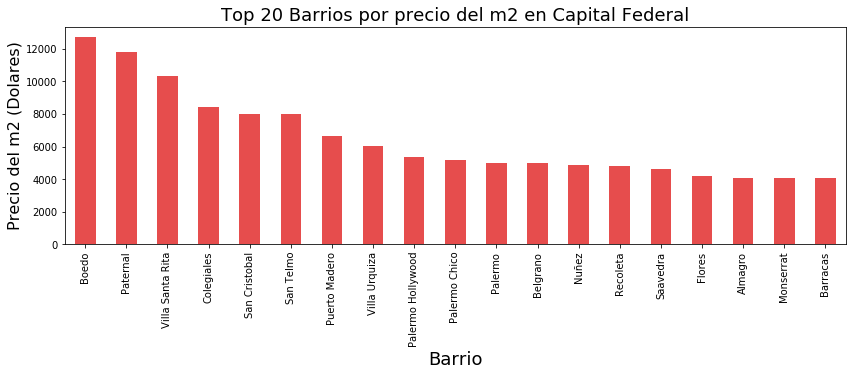

In [132]:
dataCF['barrio']= dataCF.place_name.str.upper().copy()
#Barrios de mayor precio por metro cuadrado en Capital Federal
preciom2=dataCF.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].copy()
plot= preciom2.plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3))
plot.set_title('Top 20 Barrios por precio del m2 en Capital Federal', fontsize=18);
plot.set_xlabel('Barrio', fontsize=18);
plot.set_ylabel('Precio del m2 (Dolares)', fontsize=16);


In [133]:
# Datos para plotear el mapa con Geopandas
barrios_csv = pd.read_csv('/home/matias/Escritorio/Geopandas/barrios.csv')
barrios_csv1 = barrios_csv[['WKT']]
# Shapefile
barrios = gpd.read_file('/home/matias/Escritorio/Enviroment/barrios_badata.shp') 
barrios_pd = pd.concat([barrios, barrios_csv1], axis=1)
barrios_pd.sort_values(by='BARRIO', ascending=True)
barrios_total = barrios_pd.merge(dataCF, left_on='BARRIO',right_on='barrio', how='left')
barrios_total['price_per_m2']= np.where(barrios_total['price_per_m2'].isnull(),0,barrios_total['price_per_m2'])
barrios_total['precio_propiedad']= np.where(barrios_total['precio_propiedad'].isnull(),0,barrios_total['precio_propiedad'])
barrios_total.head()

BARRIO  COMUNA    PERIMETRO          AREA  \
0  CHACARITA    15.0  7725.695228  3.118101e+06   
1  CHACARITA    15.0  7725.695228  3.118101e+06   
2  CHACARITA    15.0  7725.695228  3.118101e+06   
3  CHACARITA    15.0  7725.695228  3.118101e+06   
4  CHACARITA    15.0  7725.695228  3.118101e+06   

                                            geometry  \
0  POLYGON ((100961.3380000005 103691.9736000001,...   
1  POLYGON ((100961.3380000005 103691.9736000001,...   
2  POLYGON ((100961.3380000005 103691.9736000001,...   
3  POLYGON ((100961.3380000005 103691.9736000001,...   
4  POLYGON ((100961.3380000005 103691.9736000001,...   

                                                 WKT       state_name  \
0  POLYGON ((-58.4528200492791 -34.5959886570639,...  Capital Federal   
1  POLYGON ((-58.4528200492791 -34.5959886570639,...  Capital Federal   
2  POLYGON ((-58.4528200492791 -34.5959886570639,...  Capital Federal   
3  POLYGON ((-58.4528200492791 -34.5959886570639,...  Capital Federal   
4  POLYGON ((-58.4528200492791 -34.5959886570639,...  Capital Federal   

  place_name  surface_covered_in_m2  price_per_m2        lat        lon  \
0  Chacarita                   57.0   2017.543860 -34.583245 -58.455779   
1  Chacarita                   35.0   2428.571429 -34.572512 -58.394726   
2  Chacarita                   54.0   2961.111111 -34.591538 -58.447410   
3  Chacarita                   31.0   2580.645161 -34.585998 -58.454436   
4  Chacarita                   33.0   2424.242424 -34.572512 -58.394726   

   precio_propiedad     barrio  
0          115000.0  CHACARITA  
1           85000.0  CHACARITA  
2          159900.0  CHACARITA  
3           80000.0  CHACARITA  
4           80000.0  CHACARITA

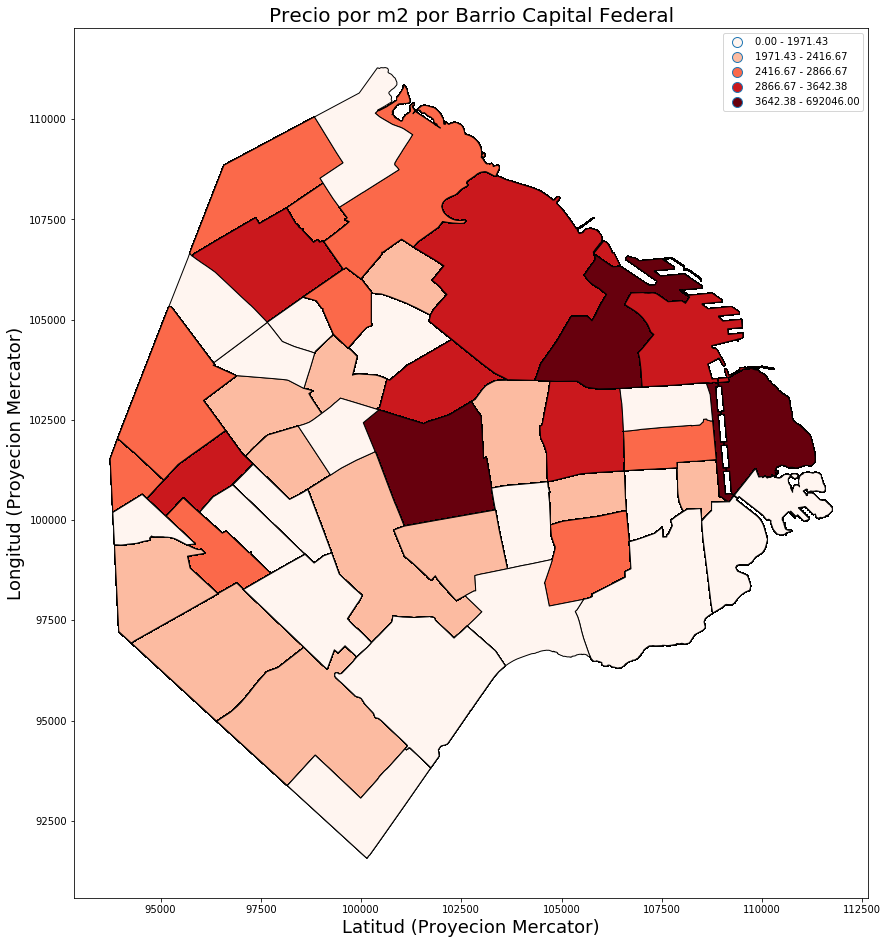

In [137]:
barrios_total.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)
figsize=(10,10)
plot = barrios_total.plot(legend=True, column='price_per_m2', cmap='Reds', scheme="Quantiles", figsize= (18,16),edgecolor='black')
plot.set_title('Precio por m2 por Barrio Capital Federal', fontsize=20);
plot.set_xlabel('Latitud (Proyecion Mercator)', fontsize=18)
plot.set_ylabel('Longitud (Proyecion Mercator)', fontsize=18)



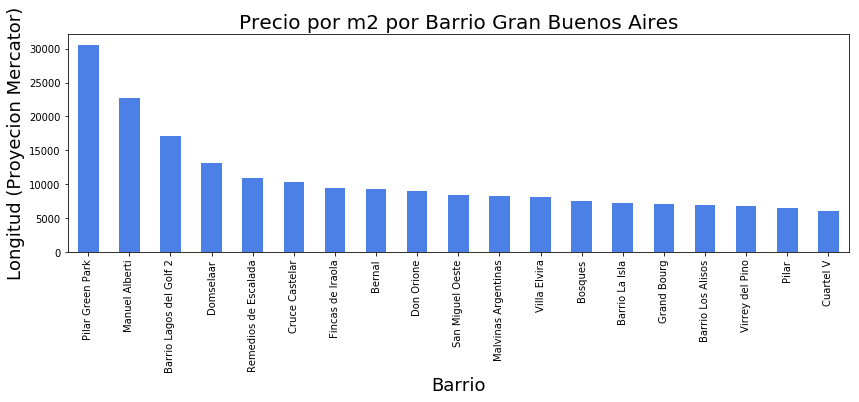

In [138]:
#Barrios de mayor precio por metro cuadrado en Gran Buenos Aires
plot = dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9))
plot.set_title('Precio por m2 por Barrio Gran Buenos Aires', fontsize=20);
plot.set_xlabel('Barrio', fontsize=18)
plot.set_ylabel('Precio del m2 (Dolares)', fontsize=18)


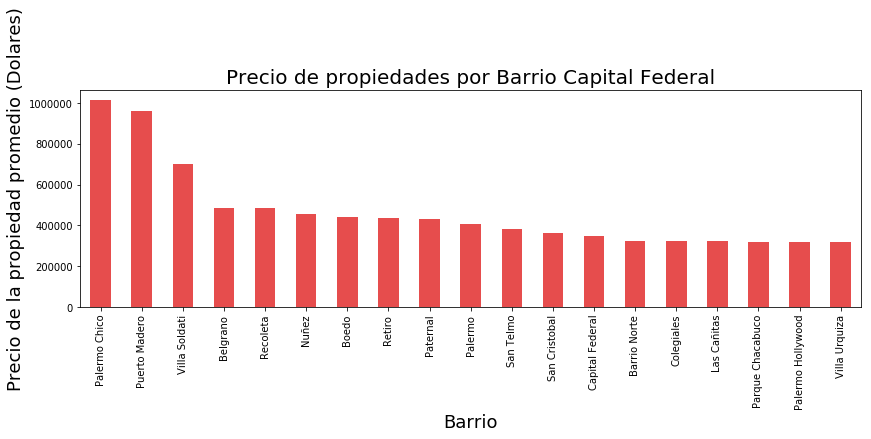

In [139]:
#Barrios de mayor precio de propiedad en Capital Federal
plot = dataCF.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3))
plot.set_title('Precio de propiedades por Barrio Capital Federal', fontsize=20);
plot.set_xlabel('Barrio', fontsize=18)
plot.set_ylabel('Precio de la propiedad promedio (Dolares)', fontsize=18)


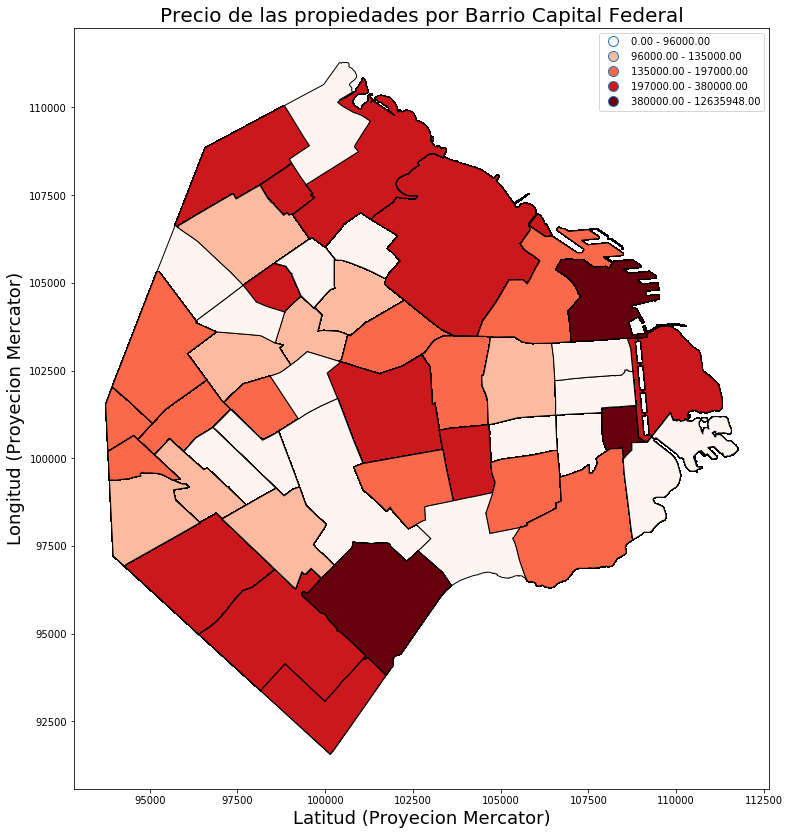

In [140]:
figsize=(16,14)
plot = barrios_total.plot(legend=True, column='precio_propiedad', cmap='Reds', scheme="Quantiles", figsize= (figsize),edgecolor='black')
plot.set_title('Precio de las propiedades por Barrio Capital Federal', fontsize=20);
plot.set_xlabel('Latitud (Proyecion Mercator)', fontsize=18)
plot.set_ylabel('Longitud (Proyecion Mercator)', fontsize=18)


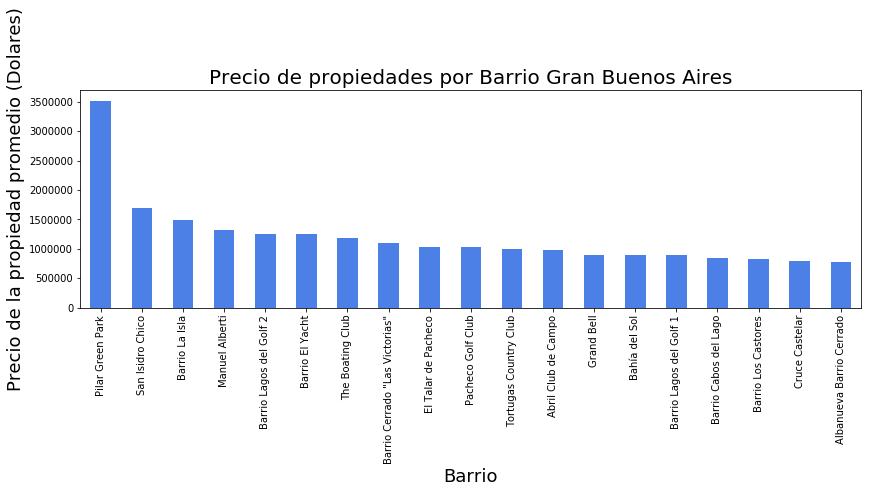

In [141]:
#Barrios de mayor precio de propiedad en Gran Buenos Aires
plot = dataGBA.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9))
plot.set_title('Precio de propiedades por Barrio Gran Buenos Aires', fontsize=20);
plot.set_xlabel('Barrio', fontsize=18)
plot.set_ylabel('Precio de la propiedad promedio (Dolares)', fontsize=18)


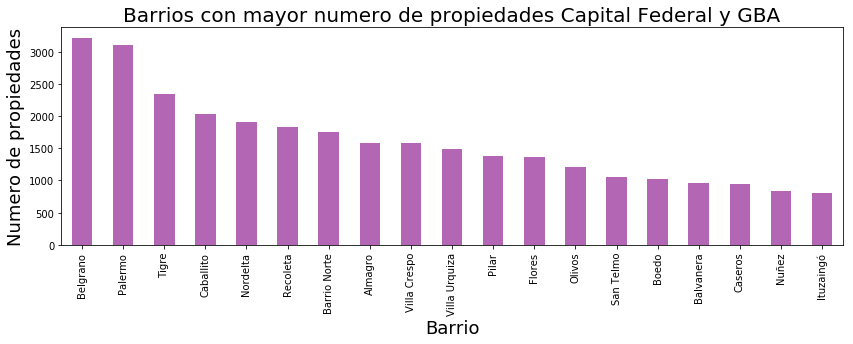

In [142]:
#Barrios con mayor numero de propiedades (GBA y CF)
plot = dataCFGBA['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7))
plot.set_title('Barrios con mayor numero de propiedades Capital Federal y GBA', fontsize=20);
plot.set_xlabel('Barrio', fontsize=18)
plot.set_ylabel('Numero de propiedades', fontsize=18)


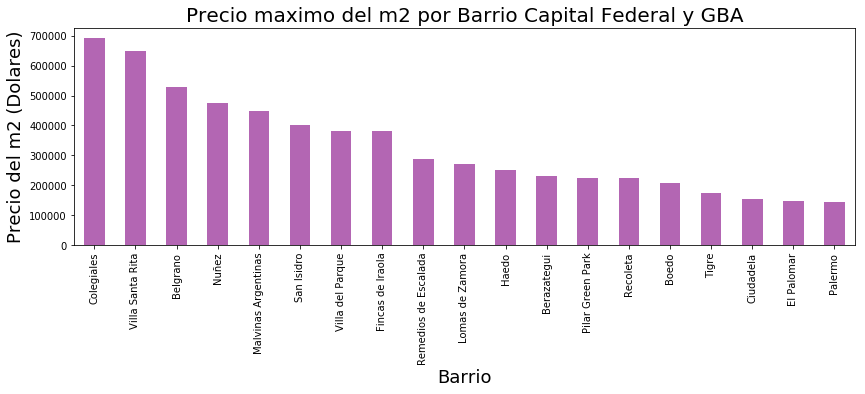

In [144]:
#Propiedades con mayor precio por metro cuadrado por barrio
plot = dataCFGBA.groupby(['place_name'], sort=False)['price_per_m2'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7))
plot.set_title('Precio maximo del m2 por Barrio Capital Federal y GBA', fontsize=20);
plot.set_xlabel('Barrio', fontsize=18)
plot.set_ylabel('Precio del m2 (Dolares)', fontsize=18)


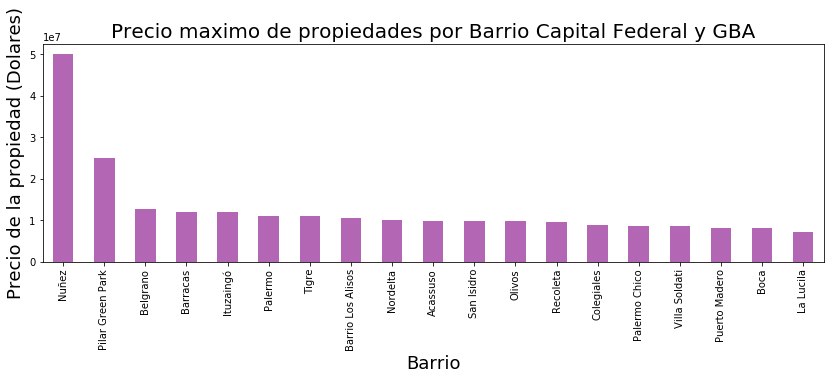

In [145]:
#Propiedades más caras por barrio
plot = dataCFGBA.groupby(['place_name'], sort=False)['precio_propiedad'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7))
plot.set_title('Precio maximo de propiedades por Barrio Capital Federal y GBA', fontsize=20);
plot.set_xlabel('Barrio', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


In [146]:
#Top 10 propiedades más caras
dataCFGBA.sort_values(['precio_propiedad'], ascending=False).head(10)

state_name        place_name  surface_covered_in_m2  \
466909           Capital Federal             Nuñez                  105.0   
466910           Capital Federal             Nuñez                  105.0   
368761  Bs.As. G.B.A. Zona Norte  Pilar Green Park                  111.0   
480994           Capital Federal          Belgrano                  138.0   
423346           Capital Federal          Barracas                 5000.0   
491599  Bs.As. G.B.A. Zona Oeste         Ituzaingó                   85.0   
481042           Capital Federal          Belgrano                  138.0   
480958           Capital Federal          Belgrano                  138.0   
480989           Capital Federal          Belgrano                  138.0   
481002           Capital Federal          Belgrano                  138.0   

         price_per_m2        lat        lon  precio_propiedad  
466909  476190.476190 -34.548221 -58.455716      5.000000e+07  
466910  476190.476190 -34.548221 -58.455716      5.000000e+07  
368761  225225.225225 -34.455906 -58.908329      2.500000e+07  
480994   91564.840580 -34.569867 -58.457581      1.263595e+07  
423346    2400.000000 -34.641421 -58.374063      1.200000e+07  
491599  141176.470588 -34.657171 -58.682625      1.200000e+07  
481042   86550.869565 -34.569867 -58.457581      1.194402e+07  
480958   84857.289855 -34.569867 -58.457581      1.171031e+07  
480989   83185.992754 -34.569867 -58.457581      1.147967e+07  
481002   81559.260870 -34.569867 -58.457581      1.125518e+07

# 3 -Analisis de propiedades mas comunes
- 3.1 - Distribucion por tipo de propiedad

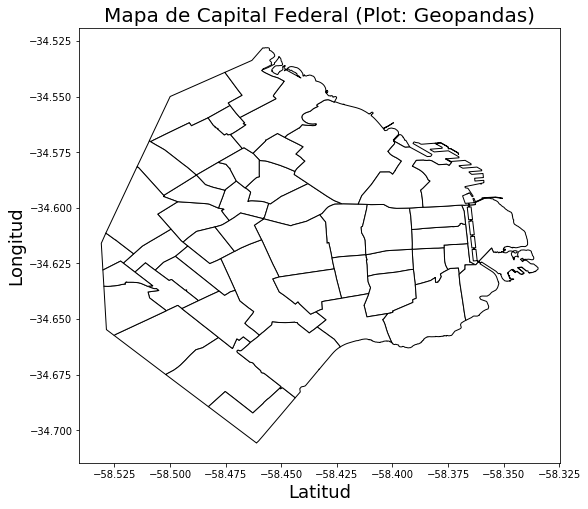

In [150]:
#Cargamos los Shapefile para geopandas y ploteamos un mapa de Capital Federal con sus limites
barrios_csv = pd.read_csv('data/shape/barrios.csv')
barrios_csv1 = barrios_csv[['WKT']]

barrios = gpd.read_file('data/shape/barrios_badata.shp') 

barrios_pd = pd.concat([barrios, barrios_csv1], axis=1)
barrios_pd.sort_values(by='BARRIO', ascending=True)
mapa_base = barrios_pd.to_crs(epsg=4326)
plot = mapa_base.plot(color='white', edgecolor='black',figsize= (12,8))
plot.set_title('Mapa de Capital Federal (Plot: Geopandas)', fontsize=20);
plot.set_xlabel('Latitud', fontsize=18)
plot.set_ylabel('Longitud', fontsize=18)



#### Ploteamos el mapa de Capital Federal sobre el cual realizaremos los plot siguientes usando la libreria Geopandas y archivos shape extraidos de la pagina del gobierno de la ciudad

In [151]:
#Data de properati
df = pd.read_csv('datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propDepto = propCF#[propCF['property_type'] == 'apartment']

propCapital = propDepto[['property_type','place_name','rooms','lat','lon','price']]
propCapital = propCapital[propCapital['lon']>-61]
propCapital = propCapital[propCapital['lat']<-34.25]
propCapital = propCapital[propCapital['price']<500000]

propCapital.dropna(inplace = True)
propCapital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 360720 to 493583
Data columns (total 6 columns):
property_type    21273 non-null object
place_name       21273 non-null object
rooms            21273 non-null float64
lat              21273 non-null float64
lon              21273 non-null float64
price            21273 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


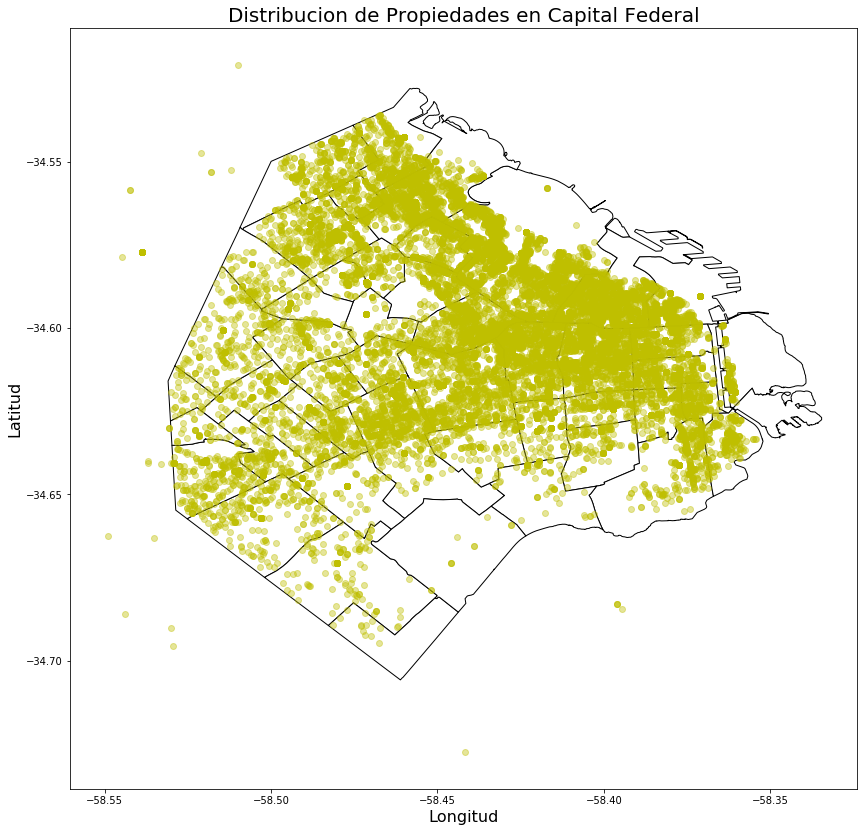

In [152]:
#Visualizamos todas als propiedades dentro del mapa de capital federal
mapa_base.plot(color='white', edgecolor='black',figsize= (18,14))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4, c='y')

plt.title('Distribucion de Propiedades en Capital Federal', fontsize= 20)
plt.ylabel("Latitud", fontsize=16)
plt.xlabel("Longitud", fontsize=16)
plt.show()

Plot de distribucion de las propiedades sobre el mapa de Capital Federal

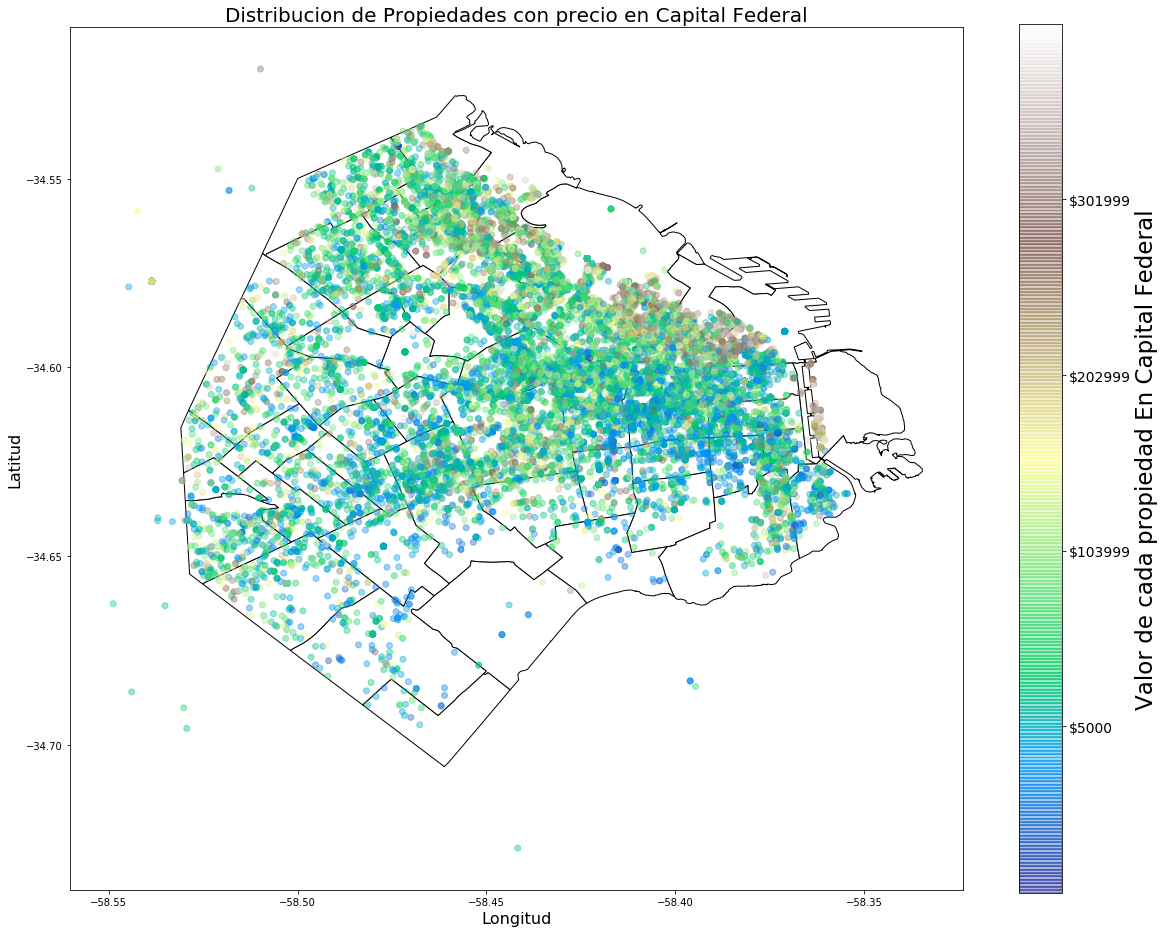

In [153]:
mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital["price"],cmap='terrain')

plt.ylabel("Latitud", fontsize=16)
plt.xlabel("Longitud", fontsize=16)


mx = max(propCapital['price'])
mn = min(propCapital['price'])
md = (mx)/2

tick_values = np.linspace(mn, mx,6)
cbar = plt.colorbar()
cbar.set_cmap("terrain")
cbar.solids.set_edgecolor("face")
cbar.solids.set_cmap("terrain")
cbar.ax.set_yticklabels(["$%d"%(v) for v in tick_values], fontsize=14)
cbar.set_label('Valor de cada propiedad En Capital Federal', fontsize=23)

plt.title('Distribucion de Propiedades con precio en Capital Federal', fontsize= 20)

plt.show()



### Ploteamos cada propiedad con un color dependiendo su precio con el objetivo de darnos una idea visual de la distribucion de precios de Capital Federal

## Analizamos el tipo de propiedad mas comun en Capital Federal por el nivel de urbanizacion suponemos que correspondera a los departamentos

In [154]:
#Por cada tipo de propiedad asignamos un color
propCapital['code_prop'] = 'turquoise'
propCapital['code_prop'] = np.where(propCapital['property_type']=='house', 'orange', propCapital['code_prop'])
propCapital['code_prop'] = np.where(propCapital['property_type']=='PH', 'crimson', propCapital['code_prop'])
propCapital['code_prop'] = np.where(propCapital['property_type']=='store','darkorchid', propCapital['code_prop'])
propCapital.head()
        

property_type        place_name  rooms        lat        lon     price  \
360720     apartment           Palermo    1.0 -34.574594 -58.419255   71000.0   
360734     apartment  Villa del Parque    2.0 -34.610611 -58.479590   96000.0   
360735     apartment  Villa del Parque    2.0 -34.610611 -58.479590   86000.0   
360742     apartment          Barracas    1.0 -34.639086 -58.369347  165000.0   
360789     apartment            Flores    3.0 -34.626397 -58.468476   92500.0   

        code_prop  
360720  turquoise  
360734  turquoise  
360735  turquoise  
360742  turquoise  
360789  turquoise

In [155]:
tipoDePropiedades = propCapital.groupby('property_type').agg([np.size])
tipoDePropiedades.head()

place_name    rooms      lat      lon    price code_prop
                    size     size     size     size     size      size
property_type                                                         
PH                  1766   1766.0   1766.0   1766.0   1766.0      1766
apartment          18835  18835.0  18835.0  18835.0  18835.0     18835
house                585    585.0    585.0    585.0    585.0       585
store                 87     87.0     87.0     87.0     87.0        87

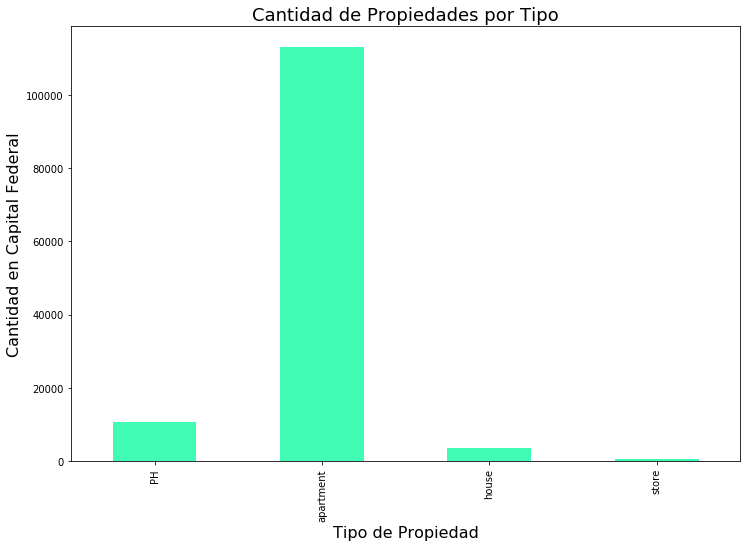

In [157]:
f = plt.figure()

plt.title ('Cantidad de Propiedades por Tipo',color='black', fontsize=18)

ax = tipoDePropiedades.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='mediumspringgreen')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal', fontsize= 16)
ax.set_xlabel('Tipo de Propiedad', fontsize= 16)
plt.show()


### En efecto, los departamentos superan ampliamente a otro tipo de propiedades como los PHs y las casas
### Utilizamos Geopandas para obsevar la distribucion del tipo de propiedades

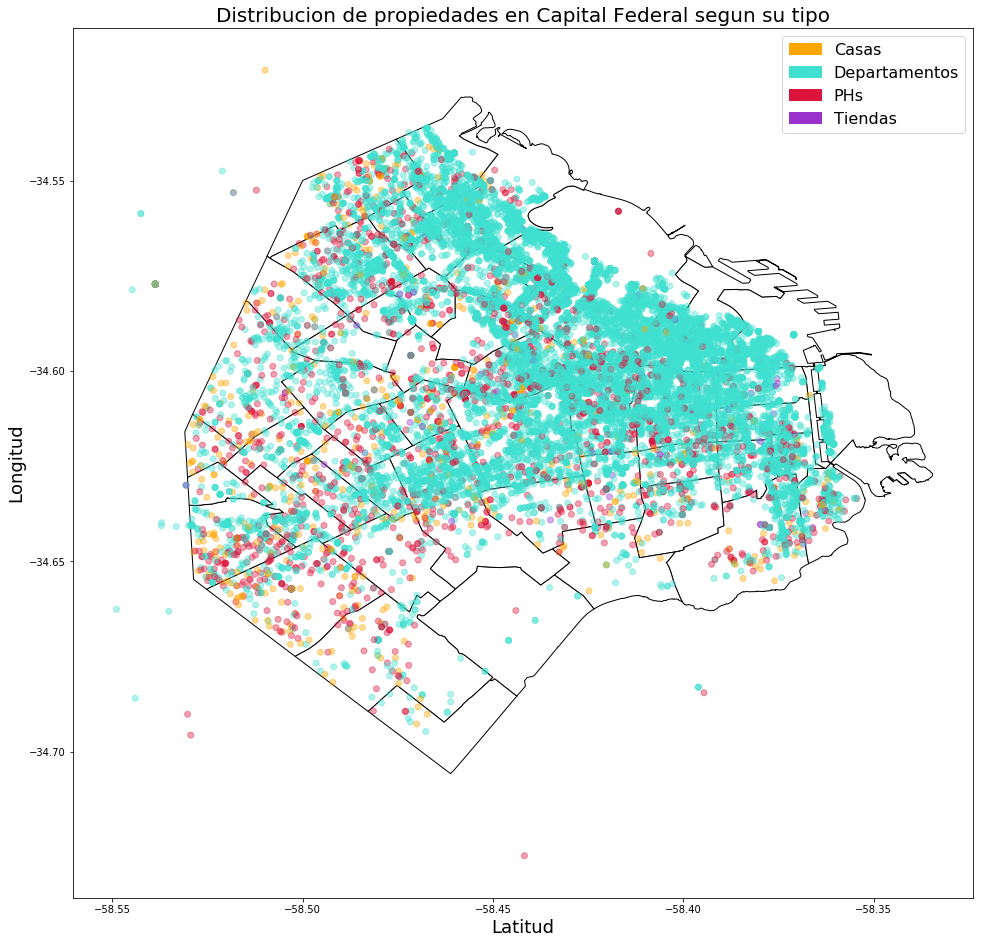

In [159]:
import matplotlib.patches as mpatches

mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital['code_prop'])
plt.title('Distribucion de propiedades en Capital Federal segun su tipo', fontsize=20);
plt.xlabel('Latitud', fontsize=18)
plt.ylabel('Longitud', fontsize=18)

red_patch = mpatches.Patch(color='orange', label='Casas')
blue_patch = mpatches.Patch(color='turquoise', label='Departamentos')
green_patch = mpatches.Patch(color='crimson', label='PHs')
yellow_patch = mpatches.Patch(color='darkorchid', label='Tiendas')
plt.legend(handles=[red_patch,blue_patch,green_patch,yellow_patch],fontsize=16)
plt.show()

### Cuantos ambientes tiene el departamento promedio en Capital Federal

In [160]:
apartamentos = propCapital[propCapital['property_type'] == 'apartment']
apartamentos = propCapital[propCapital['rooms'] <7]
apartamentosPorAmbiente = apartamentos.groupby('rooms').agg([np.size])
apartamentosPorAmbiente.head()

property_type place_name     lat     lon   price code_prop
               size       size    size    size    size      size
rooms                                                           
1.0            4894       4894  4894.0  4894.0  4894.0      4894
2.0            5846       5846  5846.0  5846.0  5846.0      5846
3.0            5599       5599  5599.0  5599.0  5599.0      5599
4.0            3504       3504  3504.0  3504.0  3504.0      3504
5.0             968        968   968.0   968.0   968.0       968

In [161]:
propCapital['code_rooms'] = 'turquoise'
propCapital['code_rooms'] = np.where(propCapital['rooms']==1, 'lightcoral', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==2, 'lightgreen', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==3,'royalblue', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==4, 'dimgray', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==5, 'khaki', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==6,'yellow', propCapital['code_rooms'])

propCapital.head()

property_type        place_name  rooms        lat        lon     price  \
360720     apartment           Palermo    1.0 -34.574594 -58.419255   71000.0   
360734     apartment  Villa del Parque    2.0 -34.610611 -58.479590   96000.0   
360735     apartment  Villa del Parque    2.0 -34.610611 -58.479590   86000.0   
360742     apartment          Barracas    1.0 -34.639086 -58.369347  165000.0   
360789     apartment            Flores    3.0 -34.626397 -58.468476   92500.0   

        code_prop  code_rooms  
360720  turquoise  lightcoral  
360734  turquoise  lightgreen  
360735  turquoise  lightgreen  
360742  turquoise  lightcoral  
360789  turquoise   royalblue

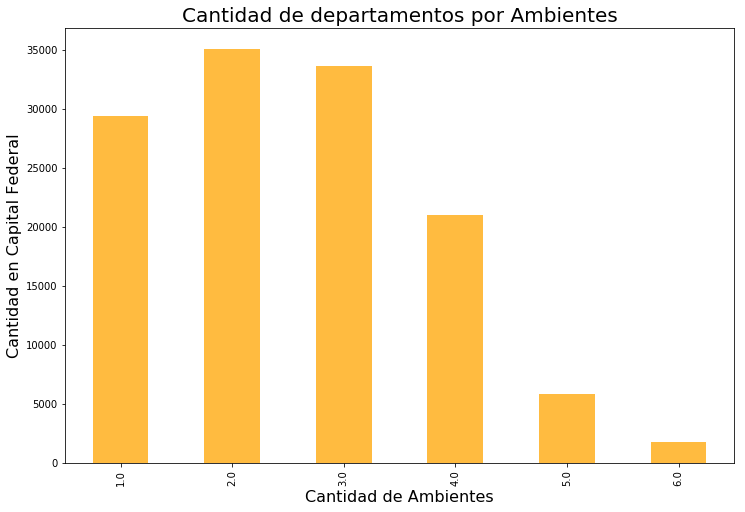

In [166]:
f = plt.figure()
plt.title ('Cantidad de departamentos por Ambientes',color='black', fontsize = 20)
plot = apartamentosPorAmbiente.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='orange')
plt.legend().remove()
plot.set_ylabel('Cantidad en Capital Federal', fontsize = 16)
plot.set_xlabel('Cantidad de Ambientes', fontsize= 16)
plt.show()


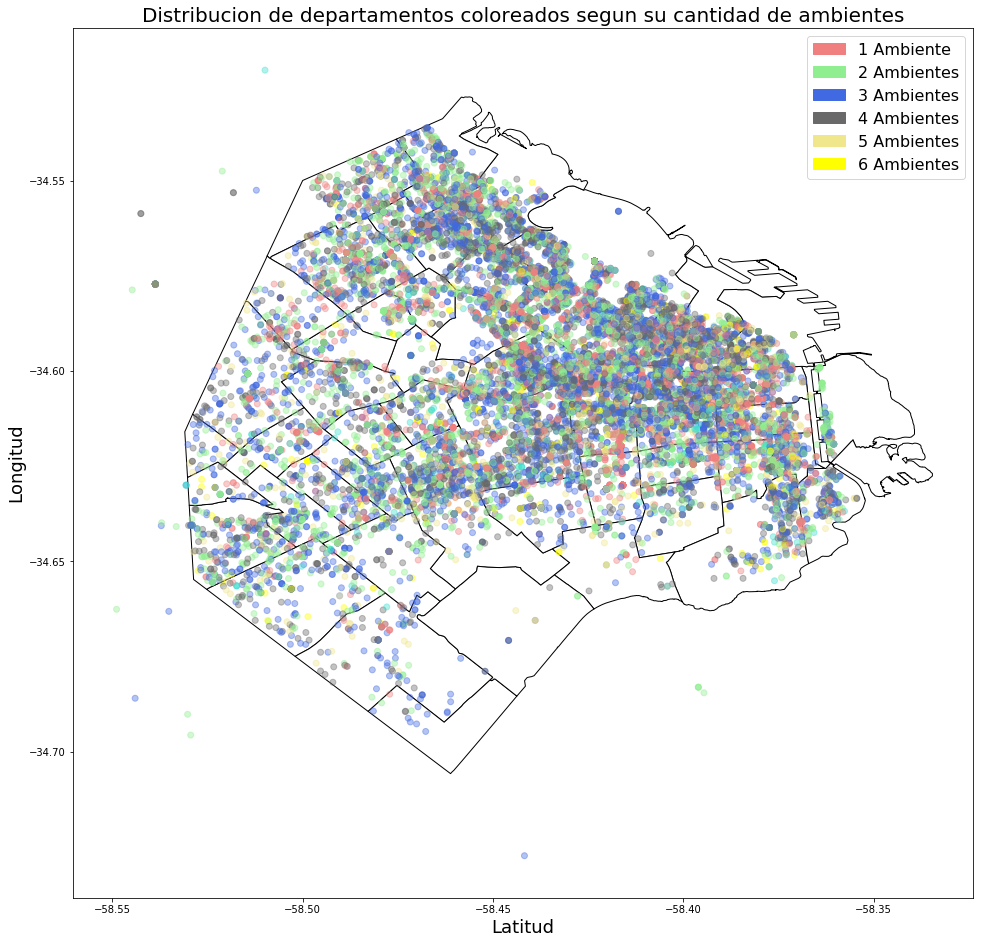

In [167]:
mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital['code_rooms'])
plt.title('Distribucion de departamentos coloreados segun su cantidad de ambientes', fontsize=20);
plt.xlabel('Latitud', fontsize=18)
plt.ylabel('Longitud', fontsize=18)

lightcoral_patch = mpatches.Patch(color='lightcoral', label='1 Ambiente')
lightgreen_patch = mpatches.Patch(color='lightgreen', label='2 Ambientes')
royalblue_patch = mpatches.Patch(color='royalblue', label='3 Ambientes')
dimgray_patch = mpatches.Patch(color='dimgray', label='4 Ambientes')
khaki_patch = mpatches.Patch(color='khaki', label='5 Ambientes')
yellow_patch = mpatches.Patch(color='yellow', label='6 Ambientes')

plt.legend(handles=[lightcoral_patch,lightgreen_patch,royalblue_patch,dimgray_patch,khaki_patch,yellow_patch],fontsize=16)
plt.show()

## Como es la distribucion de propiedades en GBA

In [169]:
#Data de properati
df = pd.read_csv('datos_procesados.csv')
buenosAires = df[df.state_name.str.contains('Buenos Aires',na=False)]
bsAs= df[df.state_name.str.contains('G.B.A.', na=False)]
propBuenosAires = pd.concat([buenosAires, bsAs])
propBuenosAires = propBuenosAires[['property_type','place_name','rooms','lat','lon','price']]
propBuenosAires.dropna(inplace = True)
propBuenosAires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28147 entries, 360730 to 493554
Data columns (total 6 columns):
property_type    28147 non-null object
place_name       28147 non-null object
rooms            28147 non-null float64
lat              28147 non-null float64
lon              28147 non-null float64
price            28147 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


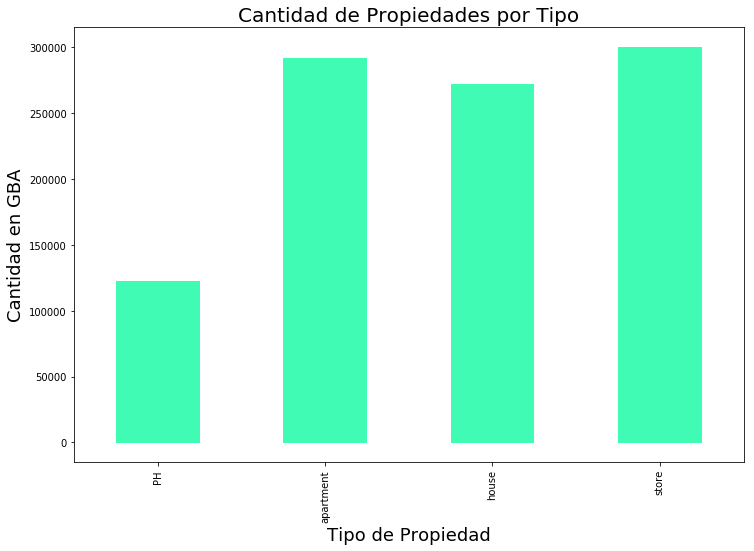

In [170]:
ptBuenosAires = propBuenosAires.groupby('property_type').agg([np.mean])
f = plt.figure()
plt.title ('Cantidad de Propiedades por Tipo',color='black', fontsize= 20)
ax = ptBuenosAires.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='mediumspringgreen')
plt.legend().remove()
ax.set_ylabel('Cantidad en GBA', fontsize = 18)
ax.set_xlabel('Tipo de Propiedad', fontsize = 18)
plt.show()

### Por el nivel de urbanizacion menor en provincia de Buenos Aires predominan las casas sobre los departamentos

## 4 - Análisis geográfico
- 4.1 - Variación del precio respecto a cercanía al Obelisco

¿La cercanía al centro afecta los precios?, Tomamos como punto de analisis la latitud y la longitud del obelisco

In [175]:
data = pd.read_csv('datos_procesados.csv').copy()

#Filtro los datos que me interesan (estado, barrio, superficie, precio, y ubicacion)
data2 = data[['state_name','surface_covered_in_m2','price_per_m2','lat','lon']].copy()

#Limpio los Na
data2.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
data2['precio_propiedad'] = data2['surface_covered_in_m2']*data2['price_per_m2']

#Separo los datos de Capital Federal
dataCF = data2[data2['state_name']== 'Capital Federal']

In [176]:
#Coordenadas del obelisco: 34°36′11″S 58°22′54″O / -34.603075, -58.381653
obelisco_lon=-58.381653
obelisco_lat=-34.603075

#le agrego a los datos de Capital Federal una columna con la distancia al centro (tomo el obelisco como referencia)
dataCF['dist_centro'] = np.absolute(dataCF['lon'] - obelisco_lon)+ np.absolute(dataCF['lat'] - obelisco_lat).copy()

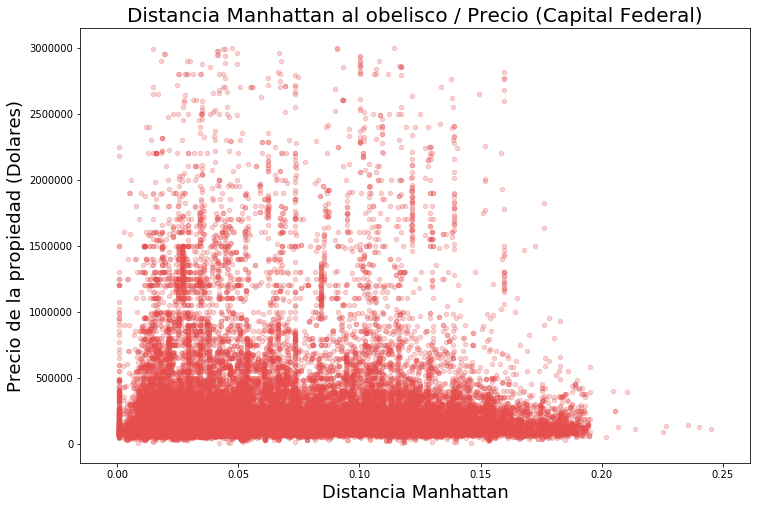

In [180]:
#Armo scatter plot con relación entre la distancia al obelisco y el precio
dataCF1 = dataCF[dataCF['precio_propiedad']< 3000000]
dataCF2 = dataCF1[dataCF1['dist_centro']< 0.3]
plot = dataCF2.plot.scatter('dist_centro', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3))
plot.set_title('Distancia Manhattan al obelisco / Precio (Capital Federal)', fontsize=20);
plot.set_xlabel('Distancia Manhattan', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


# 5 - Análisis de puntos de interés
## 5.1 - Lineas de subte

#### subte A: inicia entre los barrios (Monserrat y San nicolas) , luego balvanera, Almagro y caballito

#### subte B: San nicolas, Balvanera, Almagro, Villa crespo, Chacarita

#### subte C: Retiro, San nicolas, Monserrat, Constitucion

#### subte D: Monserrat, SAn nicolas, Balvanera, Recoleta, Palermo, Belgrano

#### subate E: Monserrat, Constitucion, San cristobal, boedo, Parque chacabuco, Parque avellaneda.

#### subte H: Parque Patricios, San Cristóbal, Balvanera, Boedo, Almagro, y Recoleta

### Hipotesis: 
#### La cercania a las estaciones de las lineas de subte influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por las respectivas lineas y veremos si la distancia a las paradas de estas influye en el precio de las propiedades.
#### Tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta


## Linea A


In [193]:
#Data de properati
df = pd.read_csv('datos_procesados.csv').copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal'].copy()

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoA= propCFf[propCFf.place_name.str.contains('Monserrat') |
                        propCFf.place_name.str.contains('San Nicolas')| #No hay datos de San Nicolas
                        propCFf.place_name.str.contains('Balvanera')|
                        propCFf.place_name.str.contains('Almagro')|
                        propCFf.place_name.str.contains('Flores')|
                        propCFf.place_name.str.contains('Caballito')].copy()

propRecorridoA.dropna(inplace = True)
propRecorridoA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4825 entries, 360789 to 493464
Data columns (total 6 columns):
property_type    4825 non-null object
place_name       4825 non-null object
rooms            4825 non-null float64
lat              4825 non-null float64
lon              4825 non-null float64
price            4825 non-null float64
dtypes: float64(4), object(2)
memory usage: 263.9+ KB


In [194]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesA = df[df['LINEA'] == 'A'].copy()
estacionesA.head(20)

X          Y    ID            ESTACION LINEA
30 -58.374268 -34.608559  31.0                PERU     A
31 -58.379085 -34.608882  32.0             PIEDRAS     A
32 -58.382232 -34.609100  33.0                LIMA     A
33 -58.386777 -34.609413  34.0          SAENZ PE�A     A
34 -58.392669 -34.609226  35.0            CONGRESO     A
35 -58.398427 -34.609646  36.0               PASCO     A
36 -58.401208 -34.609834  37.0             ALBERTI     A
37 -58.406707 -34.609817  38.0   PLAZA DE MISERERE     A
38 -58.415186 -34.610782  39.0               LORIA     A
39 -58.421816 -34.611770  40.0       CASTRO BARROS     A
40 -58.429500 -34.615206  41.0      RIO DE JANEIRO     A
41 -58.436429 -34.618280  42.0              ACOYTE     A
42 -58.441178 -34.620405  43.0       PRIMERA JUNTA     A
69 -58.370968 -34.608810  70.0       PLAZA DE MAYO     A
74 -58.456710 -34.626667  75.0            CARABOBO     A
75 -58.448648 -34.623529  76.0                PUAN     A
81 -58.469640 -34.630707  83.0         SAN PEDRITO     A
82 -58.463541 -34.629087  82.0  SAN JOS� DE FLORES     A

In [195]:
i = 1
for index, row in estacionesA.iterrows():
    lon = estacionesA.loc[index,'X']
    lat = estacionesA.loc[index,'Y']
    label = str(i)
    propRecorridoA['lon' + label] = lon
    propRecorridoA['lat' + label] = lat
    i = i+1
    


In [196]:
propRecorridoA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4825 entries, 360789 to 493464
Data columns (total 42 columns):
property_type    4825 non-null object
place_name       4825 non-null object
rooms            4825 non-null float64
lat              4825 non-null float64
lon              4825 non-null float64
price            4825 non-null float64
lon1             4825 non-null float64
lat1             4825 non-null float64
lon2             4825 non-null float64
lat2             4825 non-null float64
lon3             4825 non-null float64
lat3             4825 non-null float64
lon4             4825 non-null float64
lat4             4825 non-null float64
lon5             4825 non-null float64
lat5             4825 non-null float64
lon6             4825 non-null float64
lat6             4825 non-null float64
lon7             4825 non-null float64
lat7             4825 non-null float64
lon8             4825 non-null float64
lat8             4825 non-null float64
lon9             4825 non-null

In [8]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [198]:
for row in estacionesA.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoA['lat'].astype(float)
        lon1 = propRecorridoA['lon'].astype(float)
        lat2 = propRecorridoA['lat'+ label].astype(float)
        lon2 = propRecorridoA['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoA['dist' + label] = dist
        

In [199]:
propRecorridoA.head()

property_type place_name  rooms        lat        lon     price  \
360789     apartment     Flores    3.0 -34.626397 -58.468476   92500.0   
360877     apartment  Balvanera    3.0 -34.601861 -58.403538  150000.0   
361013     apartment    Almagro    3.0 -34.604635 -58.428826  159000.0   
361014     apartment    Almagro    3.0 -34.600351 -58.422160  110000.0   
361015     apartment     Flores    2.0 -34.644882 -58.452813   67000.0   

             lon1       lat1       lon2       lat2     ...           lat18  \
360789 -58.374268 -34.608559 -58.379085 -34.608882     ...      -34.629087   
360877 -58.374268 -34.608559 -58.379085 -34.608882     ...      -34.629087   
361013 -58.374268 -34.608559 -58.379085 -34.608882     ...      -34.629087   
361014 -58.374268 -34.608559 -58.379085 -34.608882     ...      -34.629087   
361015 -58.374268 -34.608559 -58.379085 -34.608882     ...      -34.629087   

              dist1        dist2        dist3        dist4        dist5  \
360789  8848.647502  8411.091900  8125.328576  7713.171590  7197.016974   
360877  2781.245320  2370.863271  2110.090636  1749.219828  1288.800232   
361013  5013.719643  4578.087572  4294.338773  3885.963467  3349.253563   
361014  4478.512039  4055.975388  3782.605917  3392.397613  2874.635689   
361015  8246.317666  7846.525614  7587.467779  7217.530797  6784.539254   

              dist6        dist7        dist8        dist9  
360789  6677.094354  6427.060370  5947.097472  5177.834690  
360877   984.179997   912.023372   931.268119  1456.549307  
361013  2838.215516  2593.673962  2105.371028  1423.635528  
361014  2406.113921  2188.975789  1763.460475  1324.216912  
361015  6335.370856  6124.133379  5746.110823  5123.033730  

[5 rows x 51 columns]

In [200]:
propRecorridoA['min_dist'] =propRecorridoA.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoA.head()


property_type place_name  rooms        lat        lon     price  \
360789     apartment     Flores    3.0 -34.626397 -58.468476   92500.0   
360877     apartment  Balvanera    3.0 -34.601861 -58.403538  150000.0   
361013     apartment    Almagro    3.0 -34.604635 -58.428826  159000.0   
361014     apartment    Almagro    3.0 -34.600351 -58.422160  110000.0   
361015     apartment     Flores    2.0 -34.644882 -58.452813   67000.0   

             lon1       lat1       lon2       lat2     ...             dist1  \
360789 -58.374268 -34.608559 -58.379085 -34.608882     ...       8848.647502   
360877 -58.374268 -34.608559 -58.379085 -34.608882     ...       2781.245320   
361013 -58.374268 -34.608559 -58.379085 -34.608882     ...       5013.719643   
361014 -58.374268 -34.608559 -58.379085 -34.608882     ...       4478.512039   
361015 -58.374268 -34.608559 -58.379085 -34.608882     ...       8246.317666   

              dist2        dist3        dist4        dist5        dist6  \
360789  8411.091900  8125.328576  7713.171590  7197.016974  6677.094354   
360877  2370.863271  2110.090636  1749.219828  1288.800232   984.179997   
361013  4578.087572  4294.338773  3885.963467  3349.253563  2838.215516   
361014  4055.975388  3782.605917  3392.397613  2874.635689  2406.113921   
361015  7846.525614  7587.467779  7217.530797  6784.539254  6335.370856   

              dist7        dist8        dist9     min_dist  
360789  6427.060370  5947.097472  5177.834690  5177.834690  
360877   912.023372   931.268119  1456.549307   912.023372  
361013  2593.673962  2105.371028  1423.635528  1423.635528  
361014  2188.975789  1763.460475  1324.216912  1324.216912  
361015  6124.133379  5746.110823  5123.033730  5123.033730  

[5 rows x 52 columns]

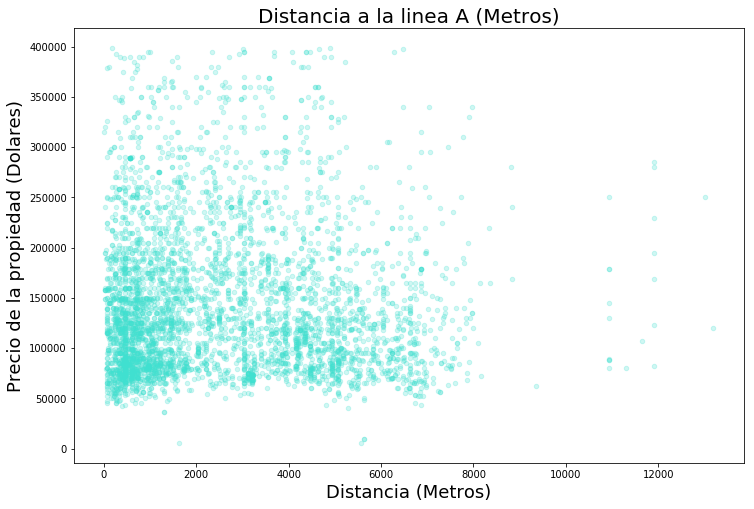

In [201]:
%matplotlib inline
propRecorridoA1 = propRecorridoA[propRecorridoA['min_dist']< 200000].copy()
propRecorridoA2 = propRecorridoA1[propRecorridoA1['price']< 400000]
plot = propRecorridoA2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color = 'turquoise')
plot.set_title('Distancia a la linea A (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


# Linea B



In [203]:
#Data de properati
df = pd.read_csv('datos_procesados.csv').copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal'].copy()

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoB= propCFf[propCFf.place_name.str.contains('San Nicolas') |
                        propCFf.place_name.str.contains('Balvanera')|
                        propCFf.place_name.str.contains('Almagro')|
                        propCFf.place_name.str.contains('Villa Crespo')|
                        propCFf.place_name.str.contains('Chacarita')].copy()

propRecorridoB.dropna(inplace = True)
propRecorridoB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 360851 to 493467
Data columns (total 6 columns):
property_type    3169 non-null object
place_name       3169 non-null object
rooms            3169 non-null float64
lat              3169 non-null float64
lon              3169 non-null float64
price            3169 non-null float64
dtypes: float64(4), object(2)
memory usage: 173.3+ KB


In [204]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesB = df[df['LINEA'] == 'B']
estacionesB.head(20)

X          Y    ID                              ESTACION LINEA
19 -58.375072 -34.603297  20.0                               FLORIDA     B
20 -58.380715 -34.603637  21.0                         C. PELLEGRINI     B
21 -58.387296 -34.604094  22.0                               URUGUAY     B
22 -58.392314 -34.604420  23.0                                CALLAO     B
23 -58.399474 -34.604643  24.0                        PASTEUR - AMIA     B
24 -58.405399 -34.604581  25.0                            PUEYRREDON     B
25 -58.411763 -34.604080  26.0                         CARLOS GARDEL     B
26 -58.420962 -34.603165  27.0                               MEDRANO     B
27 -58.431274 -34.602162  28.0                        ANGEL GALLARDO     B
28 -58.439771 -34.598967  29.0            MALABIA - OSVALDO PUGLIESE     B
29 -58.447573 -34.591718  30.0                               DORREGO     B
65 -58.455029 -34.587198  66.0                      FEDERICO LACROZE     B
71 -58.369930 -34.602989  72.0                       LEANDRO N. ALEM     B
72 -58.466227 -34.584095  73.0              TRONADOR - VILLA ORT�ZAR     B
73 -58.474241 -34.581249  74.0              DE LOS INCAS -PQUE. CHAS     B
79 -58.481014 -34.577797  80.0                            ECHEVERR�A     B
80 -58.486385 -34.574319  81.0  JUAN MANUEL DE ROSAS - VILLA URQUIZA     B

In [205]:
i = 1
for index, row in estacionesB.iterrows():
    lon = estacionesB.loc[index,'X']
    lat = estacionesB.loc[index,'Y']
    label = str(i)
    propRecorridoB['lon' + label] = lon
    propRecorridoB['lat' + label] = lat
    i = i+1
    


In [206]:
propRecorridoB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 360851 to 493467
Data columns (total 40 columns):
property_type    3169 non-null object
place_name       3169 non-null object
rooms            3169 non-null float64
lat              3169 non-null float64
lon              3169 non-null float64
price            3169 non-null float64
lon1             3169 non-null float64
lat1             3169 non-null float64
lon2             3169 non-null float64
lat2             3169 non-null float64
lon3             3169 non-null float64
lat3             3169 non-null float64
lon4             3169 non-null float64
lat4             3169 non-null float64
lon5             3169 non-null float64
lat5             3169 non-null float64
lon6             3169 non-null float64
lat6             3169 non-null float64
lon7             3169 non-null float64
lat7             3169 non-null float64
lon8             3169 non-null float64
lat8             3169 non-null float64
lon9             3169 non-null

In [207]:

for row in estacionesB.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoB['lat'].astype(float)
        lon1 = propRecorridoB['lon'].astype(float)
        lat2 = propRecorridoB['lat'+ label].astype(float)
        lon2 = propRecorridoB['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoB['dist' + label] = dist
        
    

In [208]:
propRecorridoB.head()

property_type    place_name  rooms        lat        lon     price  \
360851     apartment  Villa Crespo    1.0 -34.593977 -58.429664  140000.0   
360877     apartment     Balvanera    3.0 -34.601861 -58.403538  150000.0   
360953     apartment  Villa Crespo    2.0 -34.603285 -58.456541   75600.0   
361013     apartment       Almagro    3.0 -34.604635 -58.428826  159000.0   
361014     apartment       Almagro    3.0 -34.600351 -58.422160  110000.0   

             lon1       lat1       lon2       lat2     ...           lat17  \
360851 -58.375072 -34.603297 -58.380715 -34.603637     ...      -34.574319   
360877 -58.375072 -34.603297 -58.380715 -34.603637     ...      -34.574319   
360953 -58.375072 -34.603297 -58.380715 -34.603637     ...      -34.574319   
361013 -58.375072 -34.603297 -58.380715 -34.603637     ...      -34.574319   
361014 -58.375072 -34.603297 -58.380715 -34.603637     ...      -34.574319   

              dist1        dist2        dist3        dist4        dist5  \
360851  5104.654981  4608.593792  4038.933307  3611.454093  3007.874055   
360877  2611.003318  2098.768722  1507.510824  1066.180435   483.849876   
360953  7458.610773  6942.055997  6340.045603  5881.341460  5226.662531   
361013  4923.509652  4406.003178  3802.555520  3342.752612  2687.167378   
361014  4323.461186  3811.918768  3218.844939  2769.611382  2131.032889   

              dist6        dist7        dist8        dist9  
360851  2515.235853  1987.174886  1295.771057   922.229244  
360877   347.225355   792.397337  1601.850703  2539.535261  
360953  4684.249521  4100.447937  3257.289483  2316.627640  
361013  2144.730348  1563.406364   738.285950   354.780986  
361014  1604.926601  1038.274141   331.593977   858.406777  

[5 rows x 49 columns]

In [209]:
propRecorridoB['min_dist'] =propRecorridoB.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoB.head()

property_type    place_name  rooms        lat        lon     price  \
360851     apartment  Villa Crespo    1.0 -34.593977 -58.429664  140000.0   
360877     apartment     Balvanera    3.0 -34.601861 -58.403538  150000.0   
360953     apartment  Villa Crespo    2.0 -34.603285 -58.456541   75600.0   
361013     apartment       Almagro    3.0 -34.604635 -58.428826  159000.0   
361014     apartment       Almagro    3.0 -34.600351 -58.422160  110000.0   

             lon1       lat1       lon2       lat2     ...             dist1  \
360851 -58.375072 -34.603297 -58.380715 -34.603637     ...       5104.654981   
360877 -58.375072 -34.603297 -58.380715 -34.603637     ...       2611.003318   
360953 -58.375072 -34.603297 -58.380715 -34.603637     ...       7458.610773   
361013 -58.375072 -34.603297 -58.380715 -34.603637     ...       4923.509652   
361014 -58.375072 -34.603297 -58.380715 -34.603637     ...       4323.461186   

              dist2        dist3        dist4        dist5        dist6  \
360851  4608.593792  4038.933307  3611.454093  3007.874055  2515.235853   
360877  2098.768722  1507.510824  1066.180435   483.849876   347.225355   
360953  6942.055997  6340.045603  5881.341460  5226.662531  4684.249521   
361013  4406.003178  3802.555520  3342.752612  2687.167378  2144.730348   
361014  3811.918768  3218.844939  2769.611382  2131.032889  1604.926601   

              dist7        dist8        dist9     min_dist  
360851  1987.174886  1295.771057   922.229244   922.229244  
360877   792.397337  1601.850703  2539.535261   347.225355  
360953  4100.447937  3257.289483  2316.627640  2316.627640  
361013  1563.406364   738.285950   354.780986   354.780986  
361014  1038.274141   331.593977   858.406777   331.593977  

[5 rows x 50 columns]

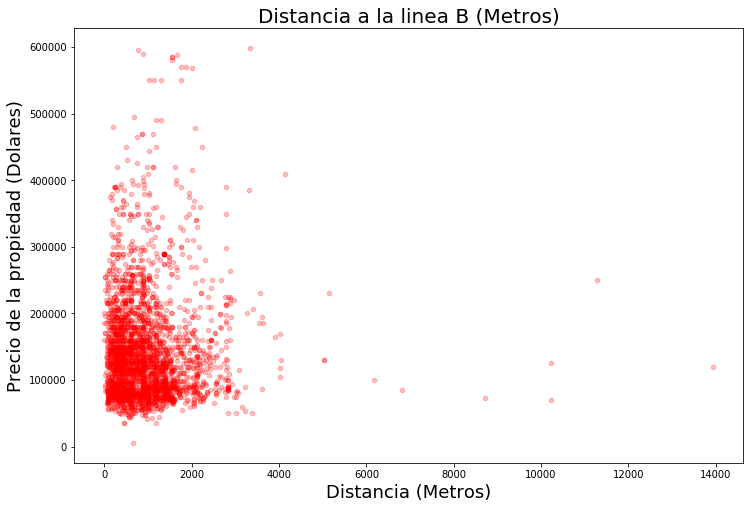

In [211]:
%matplotlib inline
propRecorridoB1 = propRecorridoB[propRecorridoB['min_dist']< 200000].copy()
propRecorridoB2 = propRecorridoB1[propRecorridoB['price']< 600000].copy()
plot = propRecorridoB2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color = 'Red')
plot.set_title('Distancia a la linea B (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)



# Linea C


In [214]:
import datetime as datetime
#Data de properati
df = pd.read_csv('datos_procesados.csv').copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoC= propCFf[propCFf.place_name.str.contains('San Nicolas') |
                        propCFf.place_name.str.contains('Monserrat')|
                        propCFf.place_name.str.contains('Retiro')|
                        propCFf.place_name.str.contains('Constitucion')]

propRecorridoC.dropna(inplace = True)
propRecorridoC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 361034 to 491718
Data columns (total 6 columns):
property_type    580 non-null object
place_name       580 non-null object
rooms            580 non-null float64
lat              580 non-null float64
lon              580 non-null float64
price            580 non-null float64
dtypes: float64(4), object(2)
memory usage: 31.7+ KB


In [215]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesC = df[df['LINEA'] == 'C']
estacionesC.head(20)

X          Y    ID        ESTACION LINEA
12 -58.374018 -34.591194  13.0          RETIRO     C
13 -58.378156 -34.601770  14.0         LAVALLE     C
14 -58.379530 -34.604844  15.0  DIAGONAL NORTE     C
15 -58.380611 -34.608983  16.0     AV. DE MAYO     C
16 -58.380444 -34.612617  17.0          MORENO     C
17 -58.380174 -34.618126  18.0   INDEPENDENCIA     C
18 -58.381434 -34.627619  19.0    CONSTITUCION     C
56 -58.377819 -34.595057  57.0      SAN MARTIN     C
57 -58.379921 -34.621917  58.0        SAN JUAN     C

In [216]:
i = 1
for index, row in estacionesC.iterrows():
    lon = estacionesC.loc[index,'X']
    lat = estacionesC.loc[index,'Y']
    label = str(i)
    propRecorridoC['lon' + label] = lon
    propRecorridoC['lat' + label] = lat
    i = i+1
    

In [217]:
propRecorridoC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 361034 to 491718
Data columns (total 24 columns):
property_type    580 non-null object
place_name       580 non-null object
rooms            580 non-null float64
lat              580 non-null float64
lon              580 non-null float64
price            580 non-null float64
lon1             580 non-null float64
lat1             580 non-null float64
lon2             580 non-null float64
lat2             580 non-null float64
lon3             580 non-null float64
lat3             580 non-null float64
lon4             580 non-null float64
lat4             580 non-null float64
lon5             580 non-null float64
lat5             580 non-null float64
lon6             580 non-null float64
lat6             580 non-null float64
lon7             580 non-null float64
lat7             580 non-null float64
lon8             580 non-null float64
lat8             580 non-null float64
lon9             580 non-null float64
lat9           

In [218]:
for row in estacionesC.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoC['lat'].astype(float)
        lon1 = propRecorridoC['lon'].astype(float)
        lat2 = propRecorridoC['lat'+ label].astype(float)
        lon2 = propRecorridoC['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoC['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoC['dist' + label] = dist
        
    

In [219]:
propRecorridoC.head()

property_type place_name  rooms        lat        lon      price  \
361034     apartment     Retiro    6.0 -34.596854 -58.383795  1000000.0   
363095     apartment  Monserrat    1.0 -34.617742 -58.383667    70000.0   
363610     apartment  Monserrat    2.0 -34.603684 -58.381559   120000.0   
363714     apartment     Retiro    4.0 -34.595263 -58.379096   325000.0   
364177     apartment  Monserrat    1.0 -34.613369 -58.385359    66000.0   

             lon1       lat1       lon2      lat2     ...            lat9  \
361034 -58.374018 -34.591194 -58.378156 -34.60177     ...      -34.621917   
363095 -58.374018 -34.591194 -58.378156 -34.60177     ...      -34.621917   
363610 -58.374018 -34.591194 -58.378156 -34.60177     ...      -34.621917   
363714 -58.374018 -34.591194 -58.378156 -34.60177     ...      -34.621917   
364177 -58.374018 -34.591194 -58.378156 -34.60177     ...      -34.621917   

              dist1        dist2        dist3        dist4        dist5  \
361034  1094.407411   752.023823   970.669604  1380.229604  1779.912614   
363095  3082.099832  1846.714651  1483.719347  1013.522202   641.756906   
363610  1551.382247   377.391809   226.134025   595.739091   998.796794   
363714   648.853610   728.891720  1066.413133  1532.387409  1934.236954   
364177  2676.064067  1448.857456  1088.042841   653.343956   457.567061   

              dist6        dist7        dist8        dist9  
361034  2389.066120  3428.732357   582.520489  2810.091399  
363095   322.578635  1117.513347  2579.245880   577.226149  
363610  1611.240234  2662.230890  1018.815487  2033.449455  
363714  2544.877050  3605.289713   119.168817  2965.600630  
364177   710.785128  1625.240791  2150.500894  1073.163902  

[5 rows x 33 columns]

In [220]:
propRecorridoC['min_dist'] =propRecorridoC.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoC.head()


property_type place_name  rooms        lat        lon      price  \
361034     apartment     Retiro    6.0 -34.596854 -58.383795  1000000.0   
363095     apartment  Monserrat    1.0 -34.617742 -58.383667    70000.0   
363610     apartment  Monserrat    2.0 -34.603684 -58.381559   120000.0   
363714     apartment     Retiro    4.0 -34.595263 -58.379096   325000.0   
364177     apartment  Monserrat    1.0 -34.613369 -58.385359    66000.0   

             lon1       lat1       lon2      lat2     ...            dist1  \
361034 -58.374018 -34.591194 -58.378156 -34.60177     ...      1094.407411   
363095 -58.374018 -34.591194 -58.378156 -34.60177     ...      3082.099832   
363610 -58.374018 -34.591194 -58.378156 -34.60177     ...      1551.382247   
363714 -58.374018 -34.591194 -58.378156 -34.60177     ...       648.853610   
364177 -58.374018 -34.591194 -58.378156 -34.60177     ...      2676.064067   

              dist2        dist3        dist4        dist5        dist6  \
361034   752.023823   970.669604  1380.229604  1779.912614  2389.066120   
363095  1846.714651  1483.719347  1013.522202   641.756906   322.578635   
363610   377.391809   226.134025   595.739091   998.796794  1611.240234   
363714   728.891720  1066.413133  1532.387409  1934.236954  2544.877050   
364177  1448.857456  1088.042841   653.343956   457.567061   710.785128   

              dist7        dist8        dist9    min_dist  
361034  3428.732357   582.520489  2810.091399  582.520489  
363095  1117.513347  2579.245880   577.226149  322.578635  
363610  2662.230890  1018.815487  2033.449455  226.134025  
363714  3605.289713   119.168817  2965.600630  119.168817  
364177  1625.240791  2150.500894  1073.163902  457.567061  

[5 rows x 34 columns]

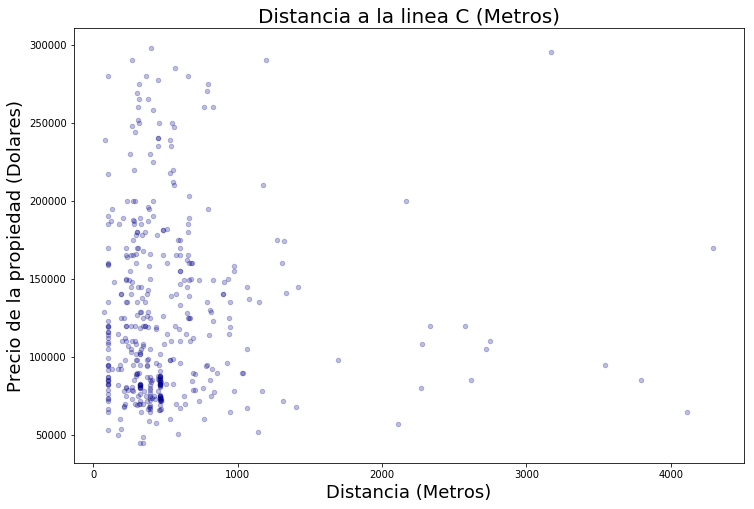

In [223]:
%matplotlib inline
propRecorridoC1 = propRecorridoC[propRecorridoC['price']< 300000]
propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist']< 20000]
plot = propRecorridoC2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color= 'DarkBlue')
plot.set_title('Distancia a la linea C (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)




# Linea D


In [225]:
df = pd.read_csv('datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propDF =df

propDFf = propDF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoD= propDFf[propDFf.place_name.str.contains('Monserrat') |
                        propDFf.place_name.str.contains('San Nicolas')|
                        propDFf.place_name.str.contains('Balvanera')|
                        propDFf.place_name.str.contains('Recoleta')|
                        propDFf.place_name.str.contains('Palermo')|
                        propDFf.place_name.str.contains('Belgrano')|
                        propDFf.place_name.str.contains('Barrio Norte')].copy()

propRecorridoD.dropna(inplace = True)
propRecorridoD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34334 entries, 2 to 493465
Data columns (total 6 columns):
property_type    34334 non-null object
place_name       34334 non-null object
rooms            34334 non-null float64
lat              34334 non-null float64
lon              34334 non-null float64
price            34334 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [226]:
df = pd.read_csv('estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesD = df[df['LINEA'] == 'D']
estacionesD.head(20)

X          Y    ID                   ESTACION LINEA
5  -58.380574 -34.604245   6.0                 9 DE JULIO     D
6  -58.397924 -34.599757   7.0       FACULTAD DE MEDICINA     D
7  -58.385142 -34.601587   8.0  TRIBUNALES - TEATRO COLÓN     D
8  -58.407161 -34.591628   9.0                     AGÜERO     D
9  -58.415955 -34.585156  10.0         R.SCALABRINI ORTIZ     D
10 -58.421196 -34.581411  11.0               PLAZA ITALIA     D
11 -58.425711 -34.578422  12.0                    PALERMO     D
53 -58.411294 -34.588237  54.0                     BULNES     D
54 -58.402395 -34.594426  55.0                 PUEYRREDON     D
55 -58.393125 -34.599640  56.0                     CALLAO     D
61 -58.435014 -34.575178  62.0          MINISTRO CARRANZA     D
62 -58.444668 -34.570012  63.0                    OLLEROS     D
63 -58.452126 -34.566215  64.0             JOSE HERNANDEZ     D
64 -58.456489 -34.562309  65.0                  JURAMENTO     D
68 -58.373956 -34.607802  69.0                   CATEDRAL     D
70 -58.462378 -34.555642  71.0        CONGRESO DE TUCUMAN     D

In [227]:
i = 1
for index, row in estacionesD.iterrows():
    lon = estacionesD.loc[index,'X']
    lat = estacionesD.loc[index,'Y']
    label = str(i)
    propRecorridoD['lon' + label] = lon
    propRecorridoD['lat' + label] = lat
    i = i+1

In [228]:
for row in estacionesD.iterrows():
    for i in range(1,17):
        label = str(i)
        lat1 = propRecorridoD['lat'].astype(float)
        lon1 = propRecorridoD['lon'].astype(float)
        lat2 = propRecorridoD['lat'+ label].astype(float)
        lon2 = propRecorridoD['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoD['dist' + label] = dist

In [229]:
propRecorridoD.head(5)

property_type place_name  rooms        lat        lon     price       lon1  \
2      apartment    Palermo    1.0 -34.597915 -58.417149   86925.0 -58.380574   
3      apartment    Palermo    2.0 -34.597915 -58.417149  127508.0 -58.380574   
21     apartment    Palermo    2.0 -34.585151 -58.411272  149000.0 -58.380574   
22     apartment   Recoleta    3.0 -34.586787 -58.385873  280000.0 -58.380574   
23     apartment    Palermo    2.0 -34.576339 -58.424261  120000.0 -58.380574   

         lat1       lon2       lat2     ...             dist7        dist8  \
2  -34.604245 -58.397924 -34.599757     ...       2305.539391  1202.548139   
3  -34.604245 -58.397924 -34.599757     ...       2305.539391  1202.548139   
21 -34.604245 -58.397924 -34.599757     ...       1519.406391   343.262167   
22 -34.604245 -58.397924 -34.599757     ...       3764.921616  2333.326046   
23 -34.604245 -58.397924 -34.599757     ...        267.063114  1778.024924   

          dist9       dist10       dist11       dist12       dist13  \
2   1405.470611  2207.866375  3011.871117  3997.763381  4763.453835   
3   1405.470611  2207.866375  3011.871117  3997.763381  4763.453835   
21  1313.324527  2314.688127  2440.766367  3491.273734  4293.496832   
22  1735.114363  1576.234557  4681.635282  5698.457295  6484.536945   
23  2838.311289  3852.914696   993.154530  1997.053751  2789.388070   

         dist14       dist15       dist16  
2   5353.781356  4104.462131  6266.168046  
3   5353.781356  4104.462131  6266.168046  
21  4858.369921  4245.078392  5716.785670  
22  7016.916387  2579.577652  7816.402713  
23  3338.828123  5784.721801  4181.906172  

[5 rows x 54 columns]

In [230]:
propRecorridoD['min_dist'] =propRecorridoD.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15','dist16']].min(axis=1)
propRecorridoD.head()

property_type place_name  rooms        lat        lon     price       lon1  \
2      apartment    Palermo    1.0 -34.597915 -58.417149   86925.0 -58.380574   
3      apartment    Palermo    2.0 -34.597915 -58.417149  127508.0 -58.380574   
21     apartment    Palermo    2.0 -34.585151 -58.411272  149000.0 -58.380574   
22     apartment   Recoleta    3.0 -34.586787 -58.385873  280000.0 -58.380574   
23     apartment    Palermo    2.0 -34.576339 -58.424261  120000.0 -58.380574   

         lat1       lon2       lat2     ...             dist8        dist9  \
2  -34.604245 -58.397924 -34.599757     ...       1202.548139  1405.470611   
3  -34.604245 -58.397924 -34.599757     ...       1202.548139  1405.470611   
21 -34.604245 -58.397924 -34.599757     ...        343.262167  1313.324527   
22 -34.604245 -58.397924 -34.599757     ...       2333.326046  1735.114363   
23 -34.604245 -58.397924 -34.599757     ...       1778.024924  2838.311289   

         dist10       dist11       dist12       dist13       dist14  \
2   2207.866375  3011.871117  3997.763381  4763.453835  5353.781356   
3   2207.866375  3011.871117  3997.763381  4763.453835  5353.781356   
21  2314.688127  2440.766367  3491.273734  4293.496832  4858.369921   
22  1576.234557  4681.635282  5698.457295  6484.536945  7016.916387   
23  3852.914696   993.154530  1997.053751  2789.388070  3338.828123   

         dist15       dist16     min_dist  
2   4104.462131  6266.168046  1151.207103  
3   4104.462131  6266.168046  1151.207103  
21  4245.078392  5716.785670   343.262167  
22  2579.577652  7816.402713  1576.234557  
23  5784.721801  4181.906172   267.063114  

[5 rows x 55 columns]

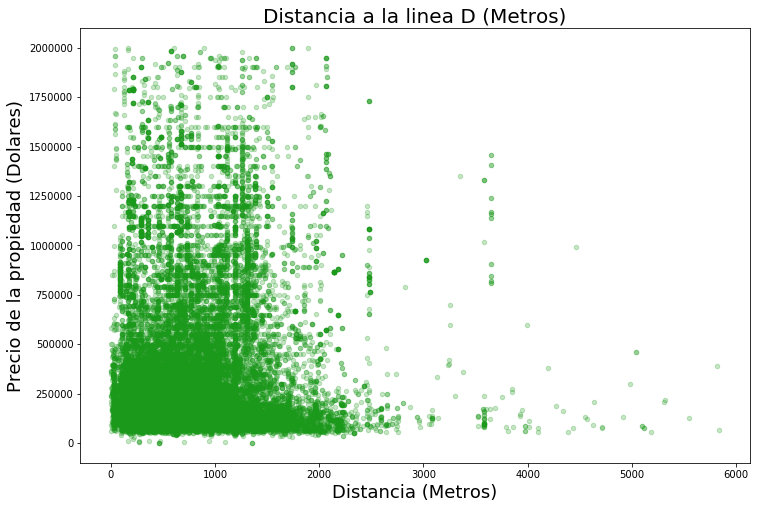

In [250]:
%matplotlib inline
propRecorridoD1 = propRecorridoD[propRecorridoD['price']< 2000000]
propRecorridoD2 = propRecorridoD1[propRecorridoD1['min_dist']< 6000]
plot = propRecorridoD2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.1,0.6,0.1))
plot.set_title('Distancia a la linea D (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


# Linea E


In [232]:
df =pd.read_csv('datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal'].copy()

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoE= propCFf[propCFf.place_name.str.contains('Monserrat') |
                        propCFf.place_name.str.contains('Constitucion')| #No hay datos de San Nicolas
                        propCFf.place_name.str.contains('San Cristobal')|
                        propCFf.place_name.str.contains('Boedo')|
                        propCFf.place_name.str.contains('Parque Chacabuco')|
                        propCFf.place_name.str.contains('Parque Avellaneda')].copy()

propRecorridoE.dropna(inplace = True)
propRecorridoE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 362163 to 493338
Data columns (total 6 columns):
property_type    1874 non-null object
place_name       1874 non-null object
rooms            1874 non-null float64
lat              1874 non-null float64
lon              1874 non-null float64
price            1874 non-null float64
dtypes: float64(4), object(2)
memory usage: 102.5+ KB


In [233]:
df = pd.read_csv('estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesE = df[df['LINEA'] == 'E']
estacionesE.head(20)

X          Y    ID                           ESTACION LINEA
43 -58.373684 -34.609242  44.0                            BOLIVAR     E
44 -58.377581 -34.612849  45.0                           BELGRANO     E
45 -58.381535 -34.617937  46.0                      INDEPENDENCIA     E
46 -58.385149 -34.622339  47.0                           SAN JOSE     E
47 -58.391512 -34.622720  48.0         ENTRE RIOS - RODOLFO WALSH     E
48 -58.397068 -34.623110  49.0                          PICHINCHA     E
49 -58.402937 -34.623866  50.0                              JUJUY     E
50 -58.409391 -34.624654  51.0                            URQUIZA     E
51 -58.433816 -34.628018  52.0                  JOSE MARIA MORENO     E
52 -58.442171 -34.631042  53.0                       EMILIO MITRE     E
58 -58.450278 -34.636389  59.0                  MEDALLA MILAGROSA     E
59 -58.426789 -34.627015  60.0                       AV. LA PLATA     E
60 -58.415533 -34.625366  61.0                              BOEDO     E
66 -58.461652 -34.643312  67.0  PLAZA DE LOS VIRREYES - EVA PERON     E
67 -58.457892 -34.640137  68.0                             VARELA     E

In [234]:
i = 1
for index, row in estacionesE.iterrows():
    lon = estacionesE.loc[index,'X']
    lat = estacionesE.loc[index,'Y']
    label = str(i)
    propRecorridoE['lon' + label] = lon
    propRecorridoE['lat' + label] = lat
    i = i+1


In [235]:
for row in estacionesE.iterrows():
    for i in range(1,16):
        label = str(i)
        lat1 = propRecorridoE['lat'].astype(float)
        lon1 = propRecorridoE['lon'].astype(float)
        lat2 = propRecorridoE['lat'+ label].astype(float)
        lon2 = propRecorridoE['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoE['dist' + label] = dist

In [236]:
propRecorridoE.head(5)

property_type     place_name  rooms        lat        lon      price  \
362163         house          Boedo    4.0 -34.630217 -58.425291   350000.0   
362316     apartment          Boedo    2.0 -34.626769 -58.425204   127500.0   
362317     apartment  San Cristobal    1.0 -34.623391 -58.398126  1409000.0   
362363     apartment  San Cristobal    1.0 -34.622886 -58.391597   965600.0   
362625     apartment          Boedo    1.0 -34.629407 -58.412741    70000.0   

             lon1       lat1       lon2       lat2     ...             dist6  \
362163 -58.373684 -34.609242 -58.377581 -34.612849     ...       2701.368571   
362316 -58.373684 -34.609242 -58.377581 -34.612849     ...       2607.138229   
362317 -58.373684 -34.609242 -58.377581 -34.612849     ...        101.731953   
362363 -58.373684 -34.609242 -58.377581 -34.612849     ...        501.369558   
362625 -58.373684 -34.609242 -58.377581 -34.612849     ...       1596.325994   

              dist7        dist8        dist9       dist10       dist11  \
362163  2164.518515  1581.360141   817.700585  1547.552282  2387.585276   
362316  2063.464386  1466.299982   800.386936  1623.951839  2532.006998   
362317   443.473316  1040.579838  3306.887410  4120.023085  4987.220957   
362363  1043.591679  1640.450320  3906.090362  4716.789032  5576.660303   
362625  1088.615037   611.142692  1935.033676  2699.561836  3522.023757   

             dist12       dist13       dist14       dist15  
362163   381.593995  1043.450049  3632.311047  3180.964163  
362316   147.654227   898.791234  3809.422559  3340.673101  
362317  2654.238318  1608.292351  6221.678365  5778.195595  
362363  3253.590977  2208.082822  6801.907837  6363.456643  
362625  1312.933354   516.975590  4735.707575  4300.931622  

[5 rows x 51 columns]

In [237]:
propRecorridoE['min_dist'] =propRecorridoE.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15']].min(axis=1)
propRecorridoE.head()

property_type     place_name  rooms        lat        lon      price  \
362163         house          Boedo    4.0 -34.630217 -58.425291   350000.0   
362316     apartment          Boedo    2.0 -34.626769 -58.425204   127500.0   
362317     apartment  San Cristobal    1.0 -34.623391 -58.398126  1409000.0   
362363     apartment  San Cristobal    1.0 -34.622886 -58.391597   965600.0   
362625     apartment          Boedo    1.0 -34.629407 -58.412741    70000.0   

             lon1       lat1       lon2       lat2     ...            dist7  \
362163 -58.373684 -34.609242 -58.377581 -34.612849     ...      2164.518515   
362316 -58.373684 -34.609242 -58.377581 -34.612849     ...      2063.464386   
362317 -58.373684 -34.609242 -58.377581 -34.612849     ...       443.473316   
362363 -58.373684 -34.609242 -58.377581 -34.612849     ...      1043.591679   
362625 -58.373684 -34.609242 -58.377581 -34.612849     ...      1088.615037   

              dist8        dist9       dist10       dist11       dist12  \
362163  1581.360141   817.700585  1547.552282  2387.585276   381.593995   
362316  1466.299982   800.386936  1623.951839  2532.006998   147.654227   
362317  1040.579838  3306.887410  4120.023085  4987.220957  2654.238318   
362363  1640.450320  3906.090362  4716.789032  5576.660303  3253.590977   
362625   611.142692  1935.033676  2699.561836  3522.023757  1312.933354   

             dist13       dist14       dist15    min_dist  
362163  1043.450049  3632.311047  3180.964163  381.593995  
362316   898.791234  3809.422559  3340.673101  147.654227  
362317  1608.292351  6221.678365  5778.195595  101.731953  
362363  2208.082822  6801.907837  6363.456643   20.049766  
362625   516.975590  4735.707575  4300.931622  516.975590  

[5 rows x 52 columns]

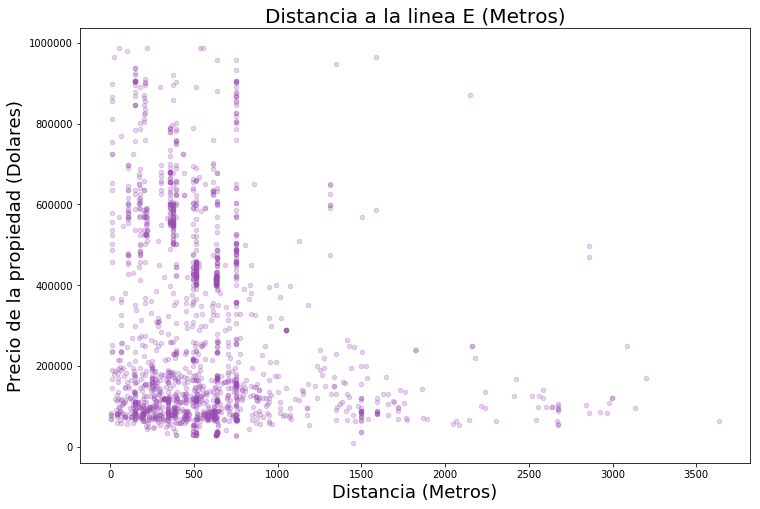

In [249]:
%matplotlib inline
propRecorridoE1 = propRecorridoE[propRecorridoE['price']< 1000000]
propRecorridoE2 = propRecorridoE1[propRecorridoE1['min_dist']< 4000]
plot =propRecorridoE2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.6,0.3,0.7))
plot.set_title('Distancia a la linea E (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


# Linea H


In [240]:
df = pd.read_csv('datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propHF = df[df['state_name']== 'Capital Federal'].copy()

propHFf = propHF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoH= propHFf[propHFf.place_name.str.contains('Parque Patricios') |
                        propHFf.place_name.str.contains('Balvanera')|
                        propHFf.place_name.str.contains('San Cristobal')|
                        propHFf.place_name.str.contains('Boedo')|
                        propHFf.place_name.str.contains('Almagro')|
                        propHFf.place_name.str.contains('Recoleta')].copy()

propRecorridoH.dropna(inplace = True)
propRecorridoH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 360877 to 493464
Data columns (total 6 columns):
property_type    4807 non-null object
place_name       4807 non-null object
rooms            4807 non-null float64
lat              4807 non-null float64
lon              4807 non-null float64
price            4807 non-null float64
dtypes: float64(4), object(2)
memory usage: 262.9+ KB


In [241]:
df = pd.read_csv('estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesH = df[df['LINEA'] == 'H'].copy()
estacionesH.head(20)

X          Y    ID                    ESTACION LINEA
0  -58.398928 -34.635750   1.0                     CASEROS     H
1  -58.400970 -34.629376   2.0                      INCLAN     H
2  -58.402323 -34.623092   3.0                 HUMBERTO 1°     H
3  -58.404732 -34.615242   4.0                   VENEZUELA     H
4  -58.406036 -34.608935   5.0      ONCE - 30 DE DICIEMBRE     H
76 -58.405450 -34.604490  77.0                  CORRIENTES     H
77 -58.405795 -34.638406  78.0            PARQUE PATRICIOS     H
78 -58.412385 -34.641269  79.0                  HOSPITALES     H
83 -58.403721 -34.598455  84.0                     CÓRDOBA     H
84 -58.397216 -34.587462  85.0                   LAS HERAS     H
85 -58.402376 -34.594525  86.0  SANTA FE - CARLOS JAUREGUI     H

In [242]:

i = 1
for index, row in estacionesH.iterrows():
    lon = estacionesH.loc[index,'X']
    lat = estacionesH.loc[index,'Y']
    label = str(i)
    propRecorridoH['lon' + label] = lon
    propRecorridoH['lat' + label] = lat
    i = i+1

In [243]:
for row in estacionesH.iterrows():
    for i in range(1,12):
        label = str(i)
        lat1 = propRecorridoH['lat'].astype(float)
        lon1 = propRecorridoH['lon'].astype(float)
        lat2 = propRecorridoH['lat'+ label].astype(float)
        lon2 = propRecorridoH['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoH['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoH['dist' + label] = dist

In [244]:
propRecorridoH.head(5)

property_type place_name  rooms        lat        lon     price  \
360877     apartment  Balvanera    3.0 -34.601861 -58.403538  150000.0   
361013     apartment    Almagro    3.0 -34.604635 -58.428826  159000.0   
361014     apartment    Almagro    3.0 -34.600351 -58.422160  110000.0   
361020            PH  Balvanera    8.0 -34.611926 -58.413776  398500.0   
361115     apartment    Almagro    3.0 -34.599666 -58.430293  158000.0   

             lon1      lat1      lon2       lat2     ...             dist2  \
360877 -58.398928 -34.63575 -58.40097 -34.629376     ...       3069.334151   
361013 -58.398928 -34.63575 -58.40097 -34.629376     ...       3751.564732   
361014 -58.398928 -34.63575 -58.40097 -34.629376     ...       3766.194052   
361020 -58.398928 -34.63575 -58.40097 -34.629376     ...       2267.372536   
361115 -58.398928 -34.63575 -58.40097 -34.629376     ...       4257.339613   

              dist3        dist4        dist5        dist6        dist7  \
360877  2364.064292  1492.311391   819.388724   340.827909  4069.976675   
361013  3178.126566  2501.397790  2140.471592  2140.125065  4307.320356   
361014  3113.742508  2299.711325  1757.943857  1597.532382  4489.926095   
361020  1625.308130   906.353984   782.712480  1124.693102  3034.506862   
361115  3653.124554  2911.583214  2448.338157  2336.822492  4857.506861   

              dist8        dist9       dist10       dist11  
360877  4457.347414   379.231513  1703.022079   822.844962  
361013  4343.631553  2399.011803  3467.769555  2669.988976  
361014  4638.232058  1701.223878  2696.592997  1923.731696  
361020  3266.187569  1758.473543  3114.987411  2198.868453  
361115  4909.121353  2436.459917  3318.869530  2619.129247  

[5 rows x 39 columns]

In [245]:
propRecorridoH['min_dist'] =propRecorridoH.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11']].min(axis=1)
propRecorridoH.head()

property_type place_name  rooms        lat        lon     price  \
360877     apartment  Balvanera    3.0 -34.601861 -58.403538  150000.0   
361013     apartment    Almagro    3.0 -34.604635 -58.428826  159000.0   
361014     apartment    Almagro    3.0 -34.600351 -58.422160  110000.0   
361020            PH  Balvanera    8.0 -34.611926 -58.413776  398500.0   
361115     apartment    Almagro    3.0 -34.599666 -58.430293  158000.0   

             lon1      lat1      lon2       lat2     ...             dist3  \
360877 -58.398928 -34.63575 -58.40097 -34.629376     ...       2364.064292   
361013 -58.398928 -34.63575 -58.40097 -34.629376     ...       3178.126566   
361014 -58.398928 -34.63575 -58.40097 -34.629376     ...       3113.742508   
361020 -58.398928 -34.63575 -58.40097 -34.629376     ...       1625.308130   
361115 -58.398928 -34.63575 -58.40097 -34.629376     ...       3653.124554   

              dist4        dist5        dist6        dist7        dist8  \
360877  1492.311391   819.388724   340.827909  4069.976675  4457.347414   
361013  2501.397790  2140.471592  2140.125065  4307.320356  4343.631553   
361014  2299.711325  1757.943857  1597.532382  4489.926095  4638.232058   
361020   906.353984   782.712480  1124.693102  3034.506862  3266.187569   
361115  2911.583214  2448.338157  2336.822492  4857.506861  4909.121353   

              dist9       dist10       dist11     min_dist  
360877   379.231513  1703.022079   822.844962   340.827909  
361013  2399.011803  3467.769555  2669.988976  2140.125065  
361014  1701.223878  2696.592997  1923.731696  1597.532382  
361020  1758.473543  3114.987411  2198.868453   782.712480  
361115  2436.459917  3318.869530  2619.129247  2336.822492  

[5 rows x 40 columns]

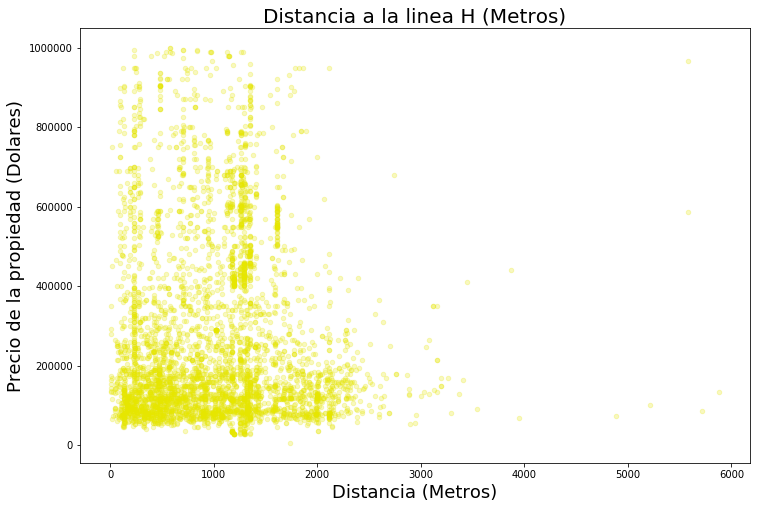

In [248]:
%matplotlib inline
propRecorridoH1 = propRecorridoH[propRecorridoH['price']< 1000000]
propRecorridoH2 = propRecorridoH1[propRecorridoH1['min_dist']< 6000]
plot =propRecorridoH2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.9,0.0))
plot.set_title('Distancia a la linea H (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


## Tomando en cuenta todas las Lineas

Despues de estudiar el mapa de Capital Federal nos dimos cuenta que hay una zona que esta cubierta por el subte y si nos alejamos de ella, hay una zona donde este medio de transporte no brinda servicio, en vez de separar el estudio por linea decidimos comparar todas las propiedades de Capital, siepre con su distancia menor a una linea de subte, a vr como influye esto con el precio

! [Imagen] (http://elpaisdigital.com.ar/media/contents/7fc7948a549c6dd37db99f38780bbb5c30cf8706.png)

In [3]:
#Data de properati
df = pd.read_csv('datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propDepto = propCF[propCF['property_type'] == 'apartment']

propCapital = propDepto[['property_type','place_name','rooms','lat','lon','price']]

propCapital.dropna(inplace = True)
propCapital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22273 entries, 360720 to 493583
Data columns (total 6 columns):
property_type    22273 non-null object
place_name       22273 non-null object
rooms            22273 non-null float64
lat              22273 non-null float64
lon              22273 non-null float64
price            22273 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


In [4]:
estaciones = pd.read_csv('estaciones-de-subte.csv')
estaciones.head()

estaciones.head(20)

X          Y    ID                   ESTACION LINEA
0  -58.398928 -34.635750   1.0                    CASEROS     H
1  -58.400970 -34.629376   2.0                     INCLAN     H
2  -58.402323 -34.623092   3.0                HUMBERTO 1�     H
3  -58.404732 -34.615242   4.0                  VENEZUELA     H
4  -58.406036 -34.608935   5.0     ONCE - 30 DE DICIEMBRE     H
5  -58.380574 -34.604245   6.0                 9 DE JULIO     D
6  -58.397924 -34.599757   7.0       FACULTAD DE MEDICINA     D
7  -58.385142 -34.601587   8.0  TRIBUNALES - TEATRO COL�N     D
8  -58.407161 -34.591628   9.0                     AG�ERO     D
9  -58.415955 -34.585156  10.0         R.SCALABRINI ORTIZ     D
10 -58.421196 -34.581411  11.0               PLAZA ITALIA     D
11 -58.425711 -34.578422  12.0                    PALERMO     D
12 -58.374018 -34.591194  13.0                     RETIRO     C
13 -58.378156 -34.601770  14.0                    LAVALLE     C
14 -58.379530 -34.604844  15.0             DIAGONAL NORTE     C
15 -58.380611 -34.608983  16.0                AV. DE MAYO     C
16 -58.380444 -34.612617  17.0                     MORENO     C
17 -58.380174 -34.618126  18.0              INDEPENDENCIA     C
18 -58.381434 -34.627619  19.0               CONSTITUCION     C
19 -58.375072 -34.603297  20.0                    FLORIDA     B

In [5]:
i = 1
for index, row in estaciones.iterrows():
    lon = estaciones.loc[index,'X']
    lat = estaciones.loc[index,'Y']
    label = str(i)
    propCapital['lon' + label] = lon
    propCapital['lat' + label] = lat
    i = i+1
    

In [6]:
propCapital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22273 entries, 360720 to 493583
Columns: 178 entries, property_type to lat86
dtypes: float64(176), object(2)
memory usage: 30.4+ MB


In [9]:
for row in estaciones.iterrows():
    for i in range(1,87):
        label = str(i)
        lat1 = propCapital['lat'].astype(float)
        lon1 = propCapital['lon'].astype(float)
        lat2 = propCapital['lat'+ label].astype(float)
        lon2 = propCapital['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propCapital['dist' + label] = dist

In [10]:
propCapital.head()

property_type        place_name  rooms        lat        lon     price  \
360720     apartment           Palermo    1.0 -34.574594 -58.419255   71000.0   
360734     apartment  Villa del Parque    2.0 -34.610611 -58.479590   96000.0   
360735     apartment  Villa del Parque    2.0 -34.610611 -58.479590   86000.0   
360742     apartment          Barracas    1.0 -34.639086 -58.369347  165000.0   
360789     apartment            Flores    3.0 -34.626397 -58.468476   92500.0   

             lon1      lat1      lon2       lat2     ...            dist77  \
360720 -58.398928 -34.63575 -58.40097 -34.629376     ...       3557.341684   
360734 -58.398928 -34.63575 -58.40097 -34.629376     ...       6821.279264   
360735 -58.398928 -34.63575 -58.40097 -34.629376     ...       6821.279264   
360742 -58.398928 -34.63575 -58.40097 -34.629376     ...       5072.165275   
360789 -58.398928 -34.63575 -58.40097 -34.629376     ...       6262.628142   

             dist78       dist79        dist80        dist81       dist82  \
360720  7203.693324  7442.575327   5667.103896   6148.057003  7760.832151   
360734  7428.201533  7032.972478   3652.063941   4084.301796  2413.653693   
360735  7428.201533  7032.972478   3652.063941   4084.301796  2413.653693   
360742  3336.258162  3945.901383  12286.986532  12911.057534  9225.562836   
360789  5889.949833  5393.208060   5526.047642   6020.021210   491.116448   

             dist83       dist84       dist85       dist86  
360720  7292.098725  3011.067527  2474.180562  2702.462501  
360734  2526.138176  7076.112939  7969.271878  7291.968753  
360735  2526.138176  7076.112939  7969.271878  7291.968753  
360742  8691.730672  5506.664300  6283.194057  5805.658449  
360789   541.842041  6692.969276  7830.211374  7012.886698  

[5 rows x 264 columns]

In [11]:
columnas = 87
cols_to_use = ['dist'+str(i) for i in range(columnas)]
propCapital['min_dist'] =propCapital.loc[:,cols_to_use].min(axis=1)
propCapital.head()


property_type        place_name  rooms        lat        lon     price  \
360720     apartment           Palermo    1.0 -34.574594 -58.419255   71000.0   
360734     apartment  Villa del Parque    2.0 -34.610611 -58.479590   96000.0   
360735     apartment  Villa del Parque    2.0 -34.610611 -58.479590   86000.0   
360742     apartment          Barracas    1.0 -34.639086 -58.369347  165000.0   
360789     apartment            Flores    3.0 -34.626397 -58.468476   92500.0   

             lon1      lat1      lon2       lat2     ...            dist78  \
360720 -58.398928 -34.63575 -58.40097 -34.629376     ...       7203.693324   
360734 -58.398928 -34.63575 -58.40097 -34.629376     ...       7428.201533   
360735 -58.398928 -34.63575 -58.40097 -34.629376     ...       7428.201533   
360742 -58.398928 -34.63575 -58.40097 -34.629376     ...       3336.258162   
360789 -58.398928 -34.63575 -58.40097 -34.629376     ...       5889.949833   

             dist79        dist80        dist81       dist82       dist83  \
360720  7442.575327   5667.103896   6148.057003  7760.832151  7292.098725   
360734  7032.972478   3652.063941   4084.301796  2413.653693  2526.138176   
360735  7032.972478   3652.063941   4084.301796  2413.653693  2526.138176   
360742  3945.901383  12286.986532  12911.057534  9225.562836  8691.730672   
360789  5393.208060   5526.047642   6020.021210   491.116448   541.842041   

             dist84       dist85       dist86     min_dist  
360720  3011.067527  2474.180562  2702.462501   728.612762  
360734  7076.112939  7969.271878  7291.968753  2413.653693  
360735  7076.112939  7969.271878  7291.968753  2413.653693  
360742  5506.664300  6283.194057  5805.658449  1688.284474  
360789  6692.969276  7830.211374  7012.886698   491.116448  

[5 rows x 265 columns]

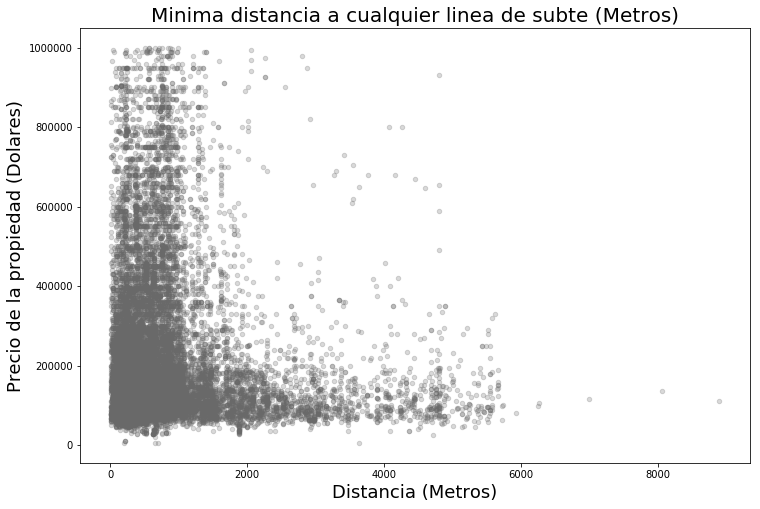

In [12]:
%matplotlib inline
propCapital1 = propCapital[propCapital['price']< 1000000]
propCapital2 = propCapital1[propCapital['min_dist']< 100000]
plot = propCapital2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), c='dimgrey')
plot.set_title('Minima distancia a cualquier linea de subte (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)



Podemos concluir que efectivamente la distancia a las paradas de subte influye en los precios de las propiedades, si bien tenemos una concentracion grande de propiedades en el rango de 1 km de distnacia al subte podemos ver que a medida que nos alejamos mas la densidad de propiedas con precios altos decrece tremendamente. Con esto podemos llegar a dos conclusiones.
1. el precio de las propiedades disminuye a medida de que nos alejamos de cualquier linea de subte en un rango de 1 km aproximadamente
2. La concentracion de propiedades disminuye a medida de que nos alejamos de las paradas del subte, esto puede ser debido a que la presencia de estos medios de transporte favorece la urbanizacion

In [13]:
#Defino una funcion que calcula la distancia entre dos puntos
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000
#Encuentra el hospital o centro de salud privado más cercano a las coordenadas dadas
def encontrar_mas_cercano(lat, lon, fuente):
    distancias = fuente.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return fuente.loc[distancias.idxmin(), 'NOMBRE']


def encontrar_escuela_mas_cercana(lat, lon): 
    distancias = loc_centros_edu.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1) 
    return loc_centros_edu.loc[distancias.idxmin(), 'nombre_escuela']

#Calcula la distancia mínima a un hospital o centro de salud
def dist_min(lat,lon,fuente):
    distancias = fuente.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()

In [14]:
#Primero veo que datos tengo respecto de estos centros
#Los datos fueron sacados de https://drive.google.com/file/d/0Bx63od1LTzcVelZhd2Q1OW1JLUE/view
centros_de_educacion =  pd.read_csv("establecimientos-educativos-prov-bsas.csv")

## 5.2 - Escuelas
 En esta seccion analizaremos si el precio del metro cuadrado para una vivienda tiene alguna relacion con la distancia a algun establecimiento educativo.

In [18]:
#Veo los distintos atributos y sus tipos
centros_de_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22289 entries, 0 to 22288
Data columns (total 25 columns):
geometry.coordinates                22289 non-null object
properties.gid                      22289 non-null int64
properties.idserv                   22289 non-null int64
properties.nombre                   22289 non-null object
properties.clave                    22289 non-null object
properties.cueanexo                 22289 non-null int64
properties.calle                    22150 non-null object
properties.nro_calle                20461 non-null object
properties.localidad                22289 non-null object
properties.referencia               6021 non-null object
properties.email                    19822 non-null object
properties.telefono                 21564 non-null object
properties.codigo_postal            21065 non-null float64
properties.distrito                 22289 non-null object
properties.region_educativa         22289 non-null int64
properties.sector        

In [19]:
#Veo que tipos de establecimiento hay
centros_de_educacion['properties.tipo_establecimiento'].value_counts()[:5]

ESCUELA DE EDUCACIÓN PRIMARIA    6363
ESCUELA SECUNDARIA               4182
JARDÍN DE INFANTES               4171
ESCUELA DE EDUCACIÓN ESPECIAL    1707
CENTRO DE ADULTOS (EGBA)          991
Name: properties.tipo_establecimiento, dtype: int64

In [20]:
centros_de_educacion = centros_de_educacion[(centros_de_educacion['properties.tipo_establecimiento'] == 'ESCUELA DE EDUCACIÓN PRIMARIA') |
                                    (centros_de_educacion['properties.tipo_establecimiento'] == 'ESCUELA SECUNDARIA') |
                                    (centros_de_educacion['properties.tipo_establecimiento'] == 'JARDÍN DE INFANTES')]

In [21]:
#Me interesa la localidad, la clave (por si necesito tener en cuenta los duplicados) y las coordenadas
loc_centros_edu =  centros_de_educacion[["geometry.coordinates","properties.nombre","properties.distrito"]].copy()
#Cambio los nombres por comodidad 
loc_centros_edu['distrito'] = loc_centros_edu['properties.distrito']
loc_centros_edu['coordenadas'] = loc_centros_edu['geometry.coordinates']
loc_centros_edu['nombre_escuela'] = loc_centros_edu['properties.nombre']
loc_centros_edu = loc_centros_edu[['coordenadas','distrito','nombre_escuela']]

In [22]:
#Separo las coordenadas
loc_centros_edu['lon'], loc_centros_edu['lat'] = loc_centros_edu['coordenadas'].str.split(',', 1).str
loc_centros_edu.head(10)

coordenadas       distrito  \
18  -62.76344792178401,-37.17682809444085  Adolfo Alsina   
19  -63.24724558731384,-37.16314534118442  Adolfo Alsina   
20                    ,-37.44672610592488  Adolfo Alsina   
21                    -63.34162596376706,  Adolfo Alsina   
22  -62.72566233225069,-37.17044240159538  Adolfo Alsina   
23  -63.25676909841502,-37.45432120256129  Adolfo Alsina   
24                    ,-36.87300069642487  Adolfo Alsina   
25  -62.76252490799794,-37.18045648747676  Adolfo Alsina   
36                    ,-37.18363491372014  Adolfo Alsina   
37  -63.11460401666187,-37.44670507437951  Adolfo Alsina   

                                 nombre_escuela                 lon  \
18       JARDIN DE INFANTES Nº901 "OLGA VIGNAU"  -62.76344792178401   
19                     JARDIN DE INFANTES Nº902  -63.24724558731384   
20  JARDIN DE INFANTES Nº903 "MARIA MONTESSORI"                       
21  JARDIN DE INFANTES Nº904 "GABRIELA MISTRAL"  -63.34162596376706   
22     JARDIN DE INFANTES Nº905 "VILLA EPECUEN"  -62.72566233225069   
23                     JARDIN DE INFANTES Nº906  -63.25676909841502   
24   JARDIN DE INFANTES Nº908 "AMERICO COPPINI"                       
25           JARDIN DE INFANTES Nº909 "CUMELEN"  -62.76252490799794   
36          ESCUELA DE EDUCACIÓN SECUNDARIA Nº2                       
37          ESCUELA DE EDUCACIÓN SECUNDARIA Nº3  -63.11460401666187   

                   lat  
18  -37.17682809444085  
19  -37.16314534118442  
20  -37.44672610592488  
21                      
22  -37.17044240159538  
23  -37.45432120256129  
24  -36.87300069642487  
25  -37.18045648747676  
36  -37.18363491372014  
37  -37.44670507437951

In [23]:
#Elimino aquellos registros a los que le falta alguna coordenada
loc_centros_edu.dropna(inplace = True)
loc_centros_edu = loc_centros_edu[(loc_centros_edu['lon'] != "") & (loc_centros_edu['lat'] != "")].copy()
loc_centros_edu = loc_centros_edu[['lon','lat','distrito','nombre_escuela']]
#Me interesa convertir las coordenadas a algun tipo numerico
loc_centros_edu[['lat','lon']] = loc_centros_edu[['lat','lon']].apply(pd.to_numeric,errors='coerce')
loc_centros_edu.dropna(inplace=True)
loc_centros_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7536 entries, 18 to 22287
Data columns (total 4 columns):
lon               7536 non-null float64
lat               7536 non-null float64
distrito          7536 non-null object
nombre_escuela    7536 non-null object
dtypes: float64(2), object(2)
memory usage: 294.4+ KB


In [24]:
loc_centros_edu.head(10)

lon        lat       distrito  \
18 -62.763448 -37.176828  Adolfo Alsina   
19 -63.247246 -37.163145  Adolfo Alsina   
22 -62.725662 -37.170442  Adolfo Alsina   
23 -63.256769 -37.454321  Adolfo Alsina   
25 -62.762525 -37.180456  Adolfo Alsina   
37 -63.114604 -37.446705  Adolfo Alsina   
44 -62.762111 -37.180183  Adolfo Alsina   
45 -62.753242 -37.180533  Adolfo Alsina   
46 -63.266903 -37.046765  Adolfo Alsina   
47 -63.291628 -36.924717  Adolfo Alsina   

                                       nombre_escuela  
18             JARDIN DE INFANTES Nº901 "OLGA VIGNAU"  
19                           JARDIN DE INFANTES Nº902  
22           JARDIN DE INFANTES Nº905 "VILLA EPECUEN"  
23                           JARDIN DE INFANTES Nº906  
25                 JARDIN DE INFANTES Nº909 "CUMELEN"  
37                ESCUELA DE EDUCACIÓN SECUNDARIA Nº3  
44  ESCUELA DE EDUCACIÓN PRIMARIA Nº1 "JOSE DE SAN...  
45  ESCUELA DE EDUCACIÓN PRIMARIA Nº3 "JUAN BAUTIS...  
46  ESCUELA DE EDUCACIÓN PRIMARIA Nº4 "ANTARTIDA A...  
47  ESCUELA DE EDUCACIÓN PRIMARIA Nº5 "MARIANO MOR...

In [25]:
#Ya tengo las coordenadas de cada centro en cada barrio de la provincia
#Ahora agrupo por clave (no me interesan duplicados)
loc_centros_edu = loc_centros_edu.drop_duplicates(keep=False)
loc_centros_edu.head(10)
#Quedan 6504 establecimientos luego de la limpieza de datos

lon        lat       distrito  \
18 -62.763448 -37.176828  Adolfo Alsina   
19 -63.247246 -37.163145  Adolfo Alsina   
22 -62.725662 -37.170442  Adolfo Alsina   
23 -63.256769 -37.454321  Adolfo Alsina   
25 -62.762525 -37.180456  Adolfo Alsina   
37 -63.114604 -37.446705  Adolfo Alsina   
44 -62.762111 -37.180183  Adolfo Alsina   
45 -62.753242 -37.180533  Adolfo Alsina   
46 -63.266903 -37.046765  Adolfo Alsina   
47 -63.291628 -36.924717  Adolfo Alsina   

                                       nombre_escuela  
18             JARDIN DE INFANTES Nº901 "OLGA VIGNAU"  
19                           JARDIN DE INFANTES Nº902  
22           JARDIN DE INFANTES Nº905 "VILLA EPECUEN"  
23                           JARDIN DE INFANTES Nº906  
25                 JARDIN DE INFANTES Nº909 "CUMELEN"  
37                ESCUELA DE EDUCACIÓN SECUNDARIA Nº3  
44  ESCUELA DE EDUCACIÓN PRIMARIA Nº1 "JOSE DE SAN...  
45  ESCUELA DE EDUCACIÓN PRIMARIA Nº3 "JUAN BAUTIS...  
46  ESCUELA DE EDUCACIÓN PRIMARIA Nº4 "ANTARTIDA A...  
47  ESCUELA DE EDUCACIÓN PRIMARIA Nº5 "MARIANO MOR...

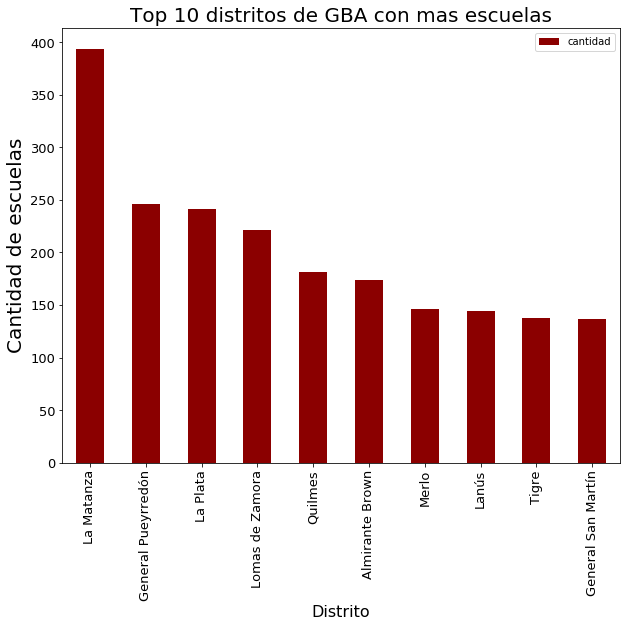

In [26]:
escuelas_por_barrio = loc_centros_edu[['distrito']].copy()
escuelas_por_barrio['cantidad'] = escuelas_por_barrio.groupby('distrito')['distrito'].transform(pd.Series.value_counts)
escuelas_por_barrio = escuelas_por_barrio.groupby('distrito').count()
top_10 = escuelas_por_barrio.sort_values('cantidad', ascending = False)[:10]
%matplotlib inline
plot = top_10.plot(kind = 'bar',figsize=(10,8), color='DarkRed' ,fontsize=13)
plot.set_title('Top 10 distritos de GBA con mas escuelas', fontsize=20);
plot.set_xlabel('Distrito', fontsize=16);
plot.set_ylabel('Cantidad de escuelas', fontsize=20);

In [30]:
#Ahora cargo las propiedades de todos los archivos de properati
ventas_properati = pd.read_csv('datos_procesados.csv').copy()

In [31]:
#Ahora uno todos los dataframes
ventas_properati.properati_url.count() #Se tienen 493836 registros

493836

##### Ahora simplemente  cuento cuantas propiedades en la provincia de Buenos Aires hay registradas (pues solo poseo datos de GBA)

In [32]:
#Me enfoco solo en provincia, dado que solo tengo datos alli
#Agrupo por properati_url
ventas_properati_gba = ventas_properati[ventas_properati.place_with_parent_names.str.contains("Buenos Aires") | 
                                        ventas_properati.place_with_parent_names.str.contains("Bs.As")].copy()
ventas_properati_gba.properati_url.count()
#259288 propiedades en GBA

259288

In [33]:
#Me interesa solo del 2013 en adelante
ventas_properati_gba = ventas_properati_gba[ventas_properati_gba.created_on.str.contains('2012') ==False]
#Elimino duplicados
ventas_properati_gba.drop_duplicates(subset='properati_url', keep="first", inplace=True)

In [34]:
#Ahora solo me quedo con las columnas que me interesan para este analisis
ventas_properati_gba = ventas_properati_gba[['place_name','price_usd_per_m2','lat','lon']]
#Cambio los nombres por comodidad
ventas_properati_gba['Localidad'] = ventas_properati_gba['place_name']
ventas_properati_gba['Precio_por_metro_cuadrado(usd)'] = ventas_properati_gba['price_usd_per_m2']
ventas_properati_gba = ventas_properati_gba[['Localidad','Precio_por_metro_cuadrado(usd)','lat','lon']]
ventas_properati.dropna(inplace=True)
ventas_properati_gba.lat.count()
#Se tienen 123196 propiedades en GBA, sin atributos nulos y cuya publicacion aparecio despues del 2012

123196

In [35]:
#Voy a buscar, para cada propiedad, cual es el establecimiento escolar mas cercano, y la distancia al mismo
#Cuando logre hacer esto, voy a graficar el precio de la propiedad vs la distancia al establecimiento mas cercano
precio_segun_distancia = ventas_properati_gba.copy()
#Agrego 2 columnas donde va a ir la informacion
precio_segun_distancia['distancia_escuela_mas_cercana(m)'] = 0
precio_segun_distancia.dropna(inplace=True)
precio_segun_distancia.head(10)

Localidad  Precio_por_metro_cuadrado(usd)        lat        lon  \
3893           Torreón                     1875.000000 -38.009416 -57.537972   
3894           Chauvín                     1146.153846 -38.014223 -57.564289   
3895       Parque Luro                     1500.000000 -37.979652 -57.554066   
3900       Lanús Oeste                     2000.000000 -34.637438 -58.407555   
3901             Tigre                     2000.000000 -34.425087 -58.579658   
3903  Jose Leon Suarez                      766.666667 -34.528673 -58.573267   
3904            Olivos                     2275.379310 -34.546085 -58.458126   
3905            Olivos                     2500.000000 -34.546085 -58.458126   
3906    Los Polvorines                     1318.181818 -34.524911 -58.708832   
3907        San Miguel                     1400.000000 -34.533983 -58.721262   

      distancia_escuela_mas_cercana(m)  
3893                                 0  
3894                                 0  
3895                                 0  
3900                                 0  
3901                                 0  
3903                                 0  
3904                                 0  
3905                                 0  
3906                                 0  
3907                                 0

In [43]:
precio_segun_distancia['escuela_mas_cercana'] = precio_segun_distancia[:100].apply(lambda row: encontrar_escuela_mas_cercana(row['lat'], row['lon']), axis=1)
precio_segun_distancia['distancia_escuela_mas_cercana(m)'] = precio_segun_distancia[:100].apply(lambda row: dist_min(row['lat'],row['lon'],loc_centros_edu), axis=1)

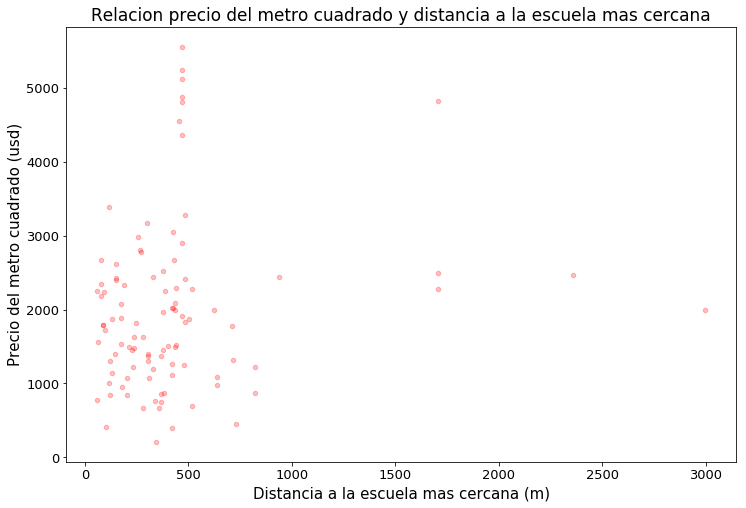

In [44]:
%matplotlib inline
df = precio_segun_distancia[precio_segun_distancia['distancia_escuela_mas_cercana(m)']< 3000]
final = df[df['Precio_por_metro_cuadrado(usd)']< 20000]
plot = final.plot.scatter('distancia_escuela_mas_cercana(m)', 'Precio_por_metro_cuadrado(usd)',alpha=0.25, figsize=(12,8),
                           color = 'red', fontsize = 13, title ='Relacion precio por metro cuadrado\
                 y distancia a escuela mas cercana')
plot.set_xlabel("Distancia a la escuela mas cercana (m)", fontsize = 15)
plot.set_ylabel("Precio del metro cuadrado (usd)", fontsize = 15)
plot.set_title("Relacion precio del metro cuadrado y distancia a la escuela mas cercana", fontsize = 17)

Puede observarse que en general, las propiedades con una escuela mas cerca tienden a costar mas caro

In [45]:
#Este analisis verifica si la cercanía a hospitales y centros de salud privados afecta el precio.
%config IPCompleter.greedy=True

In [15]:
#Datos de Properati

#Datos procesados
data = pd.read_csv('datos_procesados.csv').copy()

#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
data2 = data[['state_name', 'place_name','price_usd_per_m2','lat', 'lon']].copy()

#Elimino NAs
data2.dropna(inplace=True)

#Separo los datos en Capital Federal
dataCF = data2[data2['state_name']== 'Capital Federal']

In [16]:
#Datos de establecimientos de salud

#Hospitales. Datos extraídos de: https://data.buenosaires.gob.ar/dataset/areas-hospitalarias
hospital = pd.read_csv('areas-hospitalarias.csv', sep = ";",low_memory = False) 

#Centros de salud privados. Datos extraídos de: https://data.buenosaires.gob.ar/dataset/centros-de-salud-privados
privado = pd.read_csv('centros-de-salud-privados.csv', sep = ";",low_memory = False) 

In [17]:
privado.sample(5)

NOMBRE                DIRECCION  \
57              CLINICA GERIATRICA GUAYAQUIL            GUAYAQUIL 143   
30  INSTITUTO CARDIOVASCULAR DE BUENOS AIRES     BLANCO ENCALADA 1543   
1                CAMI - MEDICINA DEL TRABAJO     CASTRO BARROS AV. 90   
25                  HOSPITAL MILITAR CENTRAL  CAMPOS, LUIS M. AV. 726   
14                                EXCELSITAS              ZABALA 2488   

                  CALLE  ALTURA PISO              TELEFONOS  \
57            GUAYAQUIL     143  NaN              4902-1557   
30      BLANCO ENCALADA    1543  NaN  4787-7500 / 4105-7500   
1     CASTRO BARROS AV.      90  NaN              4981-6274   
25  CAMPOS, LUIS M. AV.     726  NaN       4576-5737 / 5659   
14               ZABALA    2488  NaN              4781-8545   

                                               OBSERV      BARRIO     COMUNA  \
57  NOVIEMBRE 2012:SIN PAGINA EN INTERNET PARA CHE...   CABALLITO   COMUNA 6   
30                                  NOVIEMBRE 2012:OK    BELGRANO  COMUNA 13   
1                                   NOVIEMBRE 2012:OK     ALMAGRO   COMUNA 5   
25                                  NOVIEMBRE 2012:OK     PALERMO  COMUNA 14   
14                                  NOVIEMBRE 2012:OK  COLEGIALES  COMUNA 13   

    CODIGO_POSTAL CODIGO_POSTAL_ARGENTINO           LAT           LNG  
57           1424                C1424CAC  -34,61950423  -58,43052542  
30           1428                C1428DCO  -34,55400536  -58,45078494  
1            1178                C1178AAB  -34,61288373  -58,42047607  
25           1426                C1426BOS  -34,57014122  -58,43616155  
14           1426                C1426DQT   -34,5691239  -58,44968504

In [18]:
#Tomo los datos que me interesan
privado2 = privado[['NOMBRE','LAT','LNG']].copy()
#Cambio las comas en latitud y longitud por puntos para poder usarlos como float
privado2['lat'] = privado2['LAT'].str.replace(',','.').astype(float)
privado2['lon'] = privado2['LNG'].str.replace(',','.').astype(float)

privado = privado2[['NOMBRE','lat','lon']]
privado.sample(5)

NOMBRE        lat        lon
23              HOSPITAL ISRAELITA- ISRAMED -34.619312 -58.473685
61    ALPI - SEDE PARAGUAY - UNIDAD DE MANO -34.591319 -58.415915
42                       SANATORIO SAN JOSE -34.591534 -58.410236
4            CENTRO GALLEGO DE BUENOS AIRES -34.613983 -58.397299
19  HOSPITAL DE CLINICAS JOSE DE SAN MARTIN -34.599313 -58.400599

In [19]:
hospital2 = hospital[['NOMBRE', 'WKT']].copy()
hospital2.head(12)

NOMBRE  \
0   HTAL. DR. J.M. RAMOS MEJIA   
1     HTAL. DR. A. ZUBIZARRETA   
2        HTAL. DR. C.G. DURAND   
3         HTAL. DR. T. ALVAREZ   
4        HTAL. VELEZ SARSFIELD   
5       HTAL. DR. F. SANTOJANI   
6           HTAL. DR, E. TORNU   
7          HTAL. J.A.FERNANDEZ   
8           HTAL. DR. PIROVANO   
9          HTAL. DR. P. PIÑERO   
10            HTAL. J.M. PENNA   
11       HTAL. DR. C. ARGERICH   

                                                  WKT  
0   POLYGON ((-58.411918809529602 -34.598003076028...  
1   POLYGON ((-58.493245503955578 -34.581023364390...  
2   POLYGON ((-58.426948408976038 -34.596211287114...  
3   POLYGON ((-58.460528905637787 -34.596353609283...  
4   POLYGON ((-58.488444607967679 -34.609456721242...  
5   POLYGON ((-58.474548852531036 -34.674558997865...  
6   POLYGON ((-58.467044778470367 -34.579089660706...  
7   POLYGON ((-58.427262948617766 -34.549791222454...  
8   POLYGON ((-58.456633201780775 -34.527558272632...  
9   POLYGON ((-58.445213023784945 -34.622058210435...  
10  POLYGON ((-58.382809436984942 -34.627861801861...  
11  POLYGON ((-58.373264347334342 -34.655931622539...

In [20]:
#Direcciones extraídas de Google Maps
#HTAL. DR. J.M. RAMOS MEJIA: (-34.617369, -58.410183)
#HTAL. DR. A. ZUBIZARRETA:   (-34.599915, -58.510748)
#HTAL. DR. C.G. DURAND:      (-34.609531, -58.438305)
#HTAL. DR. T. ALVAREZ:       (-34.623738, -58.469683)
#HTAL. VELEZ SARSFIELD:      (-34.625355, -58.507623)
#HTAL. DR. F. SANTOJANI:     (-34.648925, -58.515292)
#HTAL. DR, E. TORNU:         (-34.586471, -58.471636)
#HTAL. J.A.FERNANDEZ:        (-34.581443, -58.406978)
#HTAL. DR. PIROVANO:         (-34.564832, -58.470934)
#HTAL. DR. P. PIÑERO:        (-34.644780, -58.454385)
#HTAL. J.M. PENNA:           (-34.643191, -58.410067)
#HTAL. DR. C. ARGERICH:      (-34.628252, -58.365549)

hospital2['lat'] = 0.

hospital2.at[0, 'lat'] = -34.617369
hospital2.at[1, 'lat'] = -34.599915
hospital2.at[2, 'lat'] = -34.609531
hospital2.at[3, 'lat'] = -34.623738
hospital2.at[4, 'lat'] = -34.625355
hospital2.at[5, 'lat'] = -34.648925
hospital2.at[6, 'lat'] = -34.586471
hospital2.at[7, 'lat'] = -34.581443
hospital2.at[8, 'lat'] = -34.564832
hospital2.at[9, 'lat'] = -34.644780
hospital2.at[10, 'lat'] = -34.643191
hospital2.at[11, 'lat'] = -34.628252

hospital2['lon'] = 0.

hospital2.at[0, 'lon'] = -58.410183
hospital2.at[1, 'lon'] = -58.510748
hospital2.at[2, 'lon'] = -58.438305
hospital2.at[3, 'lon'] = -58.469683
hospital2.at[4, 'lon'] = -58.507623
hospital2.at[5, 'lon'] = -58.515292
hospital2.at[6, 'lon'] = -58.471636
hospital2.at[7, 'lon'] = -58.406978
hospital2.at[8, 'lon'] = -58.470934
hospital2.at[9, 'lon'] = -58.454385
hospital2.at[10, 'lon'] = -58.410067
hospital2.at[11, 'lon'] = -58.365549

hospublico = hospital2[['NOMBRE', 'lat', 'lon']]
hospublico.head(12)

NOMBRE        lat        lon
0   HTAL. DR. J.M. RAMOS MEJIA -34.617369 -58.410183
1     HTAL. DR. A. ZUBIZARRETA -34.599915 -58.510748
2        HTAL. DR. C.G. DURAND -34.609531 -58.438305
3         HTAL. DR. T. ALVAREZ -34.623738 -58.469683
4        HTAL. VELEZ SARSFIELD -34.625355 -58.507623
5       HTAL. DR. F. SANTOJANI -34.648925 -58.515292
6           HTAL. DR, E. TORNU -34.586471 -58.471636
7          HTAL. J.A.FERNANDEZ -34.581443 -58.406978
8           HTAL. DR. PIROVANO -34.564832 -58.470934
9          HTAL. DR. P. PIÑERO -34.644780 -58.454385
10            HTAL. J.M. PENNA -34.643191 -58.410067
11       HTAL. DR. C. ARGERICH -34.628252 -58.365549

In [21]:
#Busco, para cada propiedad, el centro de salud más cercano

#Agrego una columna donde irá la distancia minima al centro de salud más cercano
precio_segun_distancia = dataCF.copy()
#Agrego 2 columnas donde va a ir la informacion
precio_segun_distancia.head(10)
privado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
NOMBRE    65 non-null object
lat       65 non-null float64
lon       65 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [22]:
#Agrego columnas al dataframe con el hospital privado y centro privado más cercanos
#y las distancias mínimas a los mismos
precio_segun_distancia['privado_mas_cercano'] = precio_segun_distancia.apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'], privado), axis=1)
precio_segun_distancia['distancia_minima_privado (m)'] = precio_segun_distancia.apply(lambda row: dist_min(row['lat'],row['lon'],privado), axis=1)

precio_segun_distancia['publico_mas_cercano'] = precio_segun_distancia.apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'], hospublico), axis=1)
precio_segun_distancia['distancia_minima_publico (m)'] = precio_segun_distancia.apply(lambda row: dist_min(row['lat'],row['lon'], hospublico), axis=1)


precio_segun_distancia.sample(10)

state_name    place_name  price_usd_per_m2        lat        lon  \
397016  Capital Federal       Almagro       2285.714286 -34.600194 -58.414358   
382335  Capital Federal       Palermo       2440.740741 -34.583068 -58.415429   
450756  Capital Federal  Barrio Norte       5500.000000 -34.589546 -58.397364   
432440  Capital Federal      Belgrano       1521.739130 -34.561114 -58.457546   
397143  Capital Federal       Palermo       4285.714286 -34.579985 -58.409479   
408790  Capital Federal      Congreso       2092.105263 -34.607281 -58.398614   
388487  Capital Federal       Palermo       2050.898551 -34.588003 -58.439534   
462179  Capital Federal     Caballito       1790.000000 -34.619265 -58.442079   
433114  Capital Federal    Villa Luro       2588.235294 -34.640495 -58.529035   
413660  Capital Federal       Palermo       2828.282828 -34.565051 -58.434234   

                                      privado_mas_cercano  \
397016  ALPI - SEDE MARIO BRAVO - UNIDAD PEDIATRIA Y T...   
382335                                 CLINICA BAZTERRICA   
450756             FUNDALEU FUND. ARG. CONTRA LA LEUCEMIA   
432440  FLENI FUND. LUCHA CONTRA ENF. NEUROLOGICAS INF...   
397143                                       CLINICA JURI   
408790                    INSTITUTO MEDICO DE OBSTETRICIA   
388487                             SANATORIO DE LOS ARCOS   
462179                                INSTITUTO ANTARTIDA   
433114                        HOSPITAL ISRAELITA- ISRAMED   
413660                           HOSPITAL MILITAR CENTRAL   

        distancia_minima_privado (m)         publico_mas_cercano  \
397016                    195.710138  HTAL. DR. J.M. RAMOS MEJIA   
382335                    853.877946         HTAL. J.A.FERNANDEZ   
450756                    223.613950         HTAL. J.A.FERNANDEZ   
432440                    924.346454          HTAL. DR. PIROVANO   
397143                    372.761883         HTAL. J.A.FERNANDEZ   
408790                     36.318614  HTAL. DR. J.M. RAMOS MEJIA   
388487                   1219.762584       HTAL. DR. C.G. DURAND   
462179                    584.391869       HTAL. DR. C.G. DURAND   
433114                   5585.222537      HTAL. DR. F. SANTOJANI   
413660                    592.936722         HTAL. J.A.FERNANDEZ   

        distancia_minima_publico (m)  
397016                   1947.642475  
382335                    794.456508  
450756                   1259.547800  
432440                   1293.803989  
397143                    280.534246  
408790                   1542.444419  
388487                   2396.414408  
462179                   1136.083651  
433114                   1568.208630  
413660                   3090.281428

In [23]:
print(len(precio_segun_distancia))
precio_segun_distancia.dropna(inplace=True)
print(len(precio_segun_distancia))

36942
36942


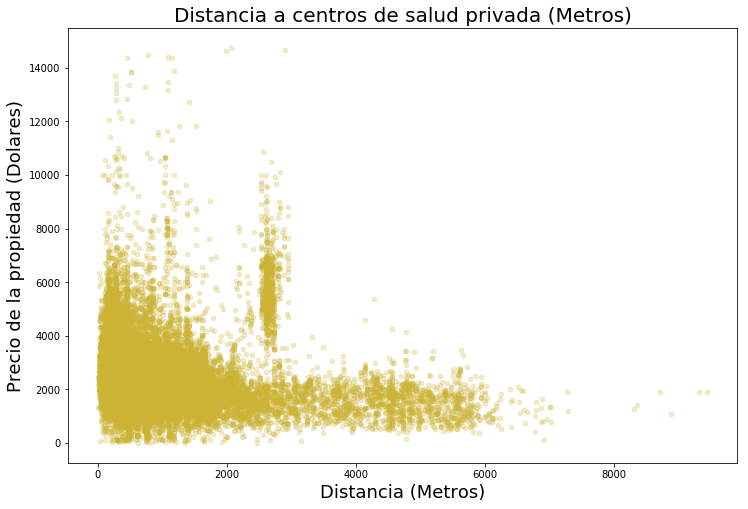

In [24]:
#Evaluo la relacion entre precio y distancia a centros de salud privada

precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['price_usd_per_m2']< 15000]
precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['distancia_minima_privado (m)']< 10000]
plot = precio_segun_distancia.plot.scatter('distancia_minima_privado (m)', 'price_usd_per_m2',alpha=0.25, figsize=(12,8),color=(0.8,0.7,0.2))
plot.set_title('Distancia a centros de salud privada (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


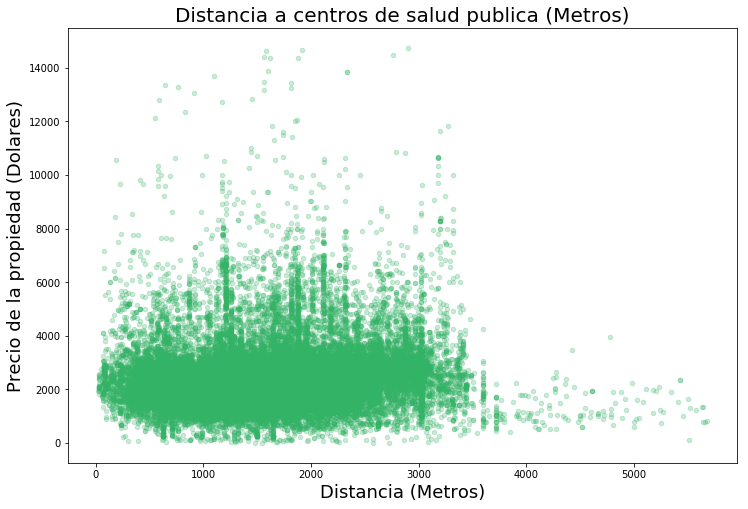

In [25]:
#Evaluo la relacion entre precio y distancia a hospitales publicos

precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['price_usd_per_m2']< 15000]
precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['distancia_minima_publico (m)']< 6000]
plot =precio_segun_distancia.plot.scatter('distancia_minima_publico (m)', 'price_usd_per_m2',alpha=0.25, figsize=(12,8),color=(0.2,0.7,0.4))
plot.set_title('Distancia a centros de salud publica (Metros)', fontsize=20);
plot.set_xlabel('Distancia (Metros)', fontsize=18)
plot.set_ylabel('Precio de la propiedad (Dolares)', fontsize=18)


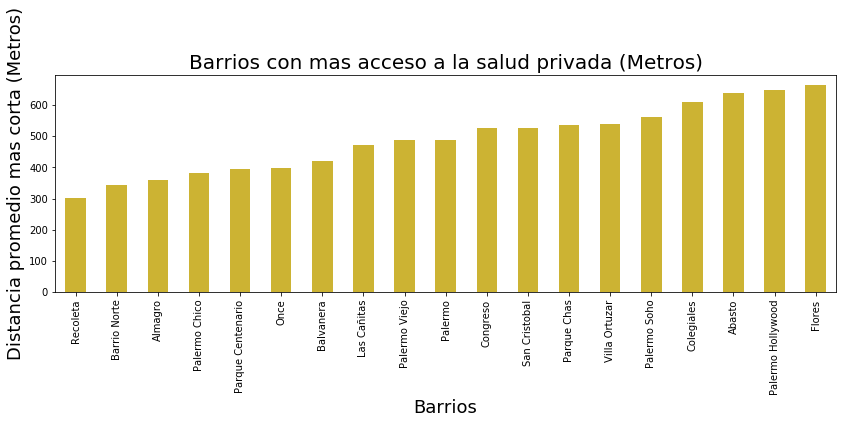

In [26]:
#Barrios con mas acceso a centros de salud privada
plot = precio_segun_distancia.groupby(['place_name'], sort=False)['distancia_minima_privado (m)'].mean().sort_values(ascending=True)[0:19].plot(kind='bar',figsize=(14,4), color=(0.8,0.7,0.2))
plot.set_title('Barrios con mas acceso a la salud privada (Metros)', fontsize=20);
plot.set_xlabel('Barrios', fontsize=18)
plot.set_ylabel('Distancia promedio mas corta (Metros)', fontsize=18)


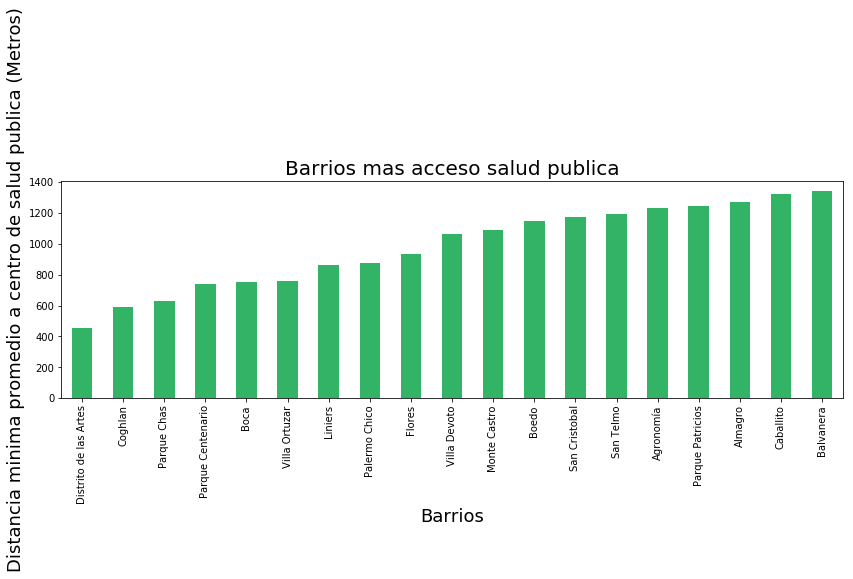

In [27]:
#Barrios con mas acceso a hospitales públicos
plot = precio_segun_distancia.groupby(['place_name'], sort=False)['distancia_minima_publico (m)'].mean().sort_values(ascending=True)[0:19].plot(kind='bar',figsize=(14,4), color=(0.2,0.7,0.4))
plot.set_title('Barrios mas acceso salud publica', fontsize=20);
plot.set_xlabel('Barrios', fontsize=18)
plot.set_ylabel('Distancia minima promedio a centro de salud publica (Metros)', fontsize=18)


Comparo estos barrios con los que tienen mayor precio por metro cuadrado, y hay mayor concordancia entre los que están más próximos a centros de salud privada que hospitales públicos.

### Concluimos que la proximidad a centros de salud privada aumentan el precio, mientras que la proximidad a hospitales públicos no lo afecta de manera considerable.

In [28]:
propiedades = pd.read_csv('datos_procesados.csv').copy()

# 6 - Análisis de precios vs contaminación sonora

In [29]:
#Como solo tengo informacion de la contaminacion sonora en capital federal, me quedo con las propiedades de alli 
propiedades_capital = propiedades[propiedades.place_with_parent_names.str.contains("Capital Federal")].copy()


In [30]:
#Me interesa solo el precio por metro cuadrado en dolares, barrio(place_name)
propiedades_barrios = propiedades_capital[['place_name','price_usd_per_m2']]
#Se tienen los precios por metro cuadrado por barrio, pero capital federal no es un barrio, asi que lo remuevo
propiedades_barrios= propiedades_barrios[propiedades_barrios['place_name'] != 'Capital Federal']
propiedades_barrios.head(10)

place_name  price_usd_per_m2
2             Palermo       2716.406250
3             Palermo       2602.204082
7         Las Cañitas       2500.000000
8              Flores        880.000000
9            Floresta       2076.000000
10  Parque Centenario       1083.333333
11            Liniers       1064.814815
13       Constitución       1725.000000
14       Constitución       1530.000000
15             Abasto       1723.076923

In [31]:
#No me interesan los datos con nulos
propiedades_barrios.dropna(inplace = True)

In [32]:
#Antes de agrupar por barrio, primero le cambio el nombre al atributo, para el join posterior con los datos de contaminacion
propiedades_barrios['BARRIO'] = propiedades_barrios['place_name']
propiedades_barrios['Precio_m2(usd)'] = propiedades_barrios['price_usd_per_m2']
propiedades_barrios = propiedades_barrios[['BARRIO','Precio_m2(usd)']]
#Agrupo por barrios
promedio_por_barrios = propiedades_barrios.groupby('BARRIO').mean()
promedio_por_barrios = promedio_por_barrios.sort_values(by='Precio_m2(usd)',ascending=False)
promedio_por_barrios.head(10)

Precio_m2(usd)
BARRIO                           
Puerto Madero         5313.900277
Nuñez                 3739.301610
Palermo Chico         3475.096645
San Cristobal         3349.443234
Las Cañitas           3311.376900
Boedo                 3289.157468
Recoleta              3121.070097
Palermo Soho          3090.992981
Palermo               3033.773631
Palermo Hollywood     2964.084111

In [33]:
promedio_por_barrios.dropna(inplace=True)
promedio_por_barrios.head(5)

Precio_m2(usd)
BARRIO                       
Puerto Madero     5313.900277
Nuñez             3739.301610
Palermo Chico     3475.096645
San Cristobal     3349.443234
Las Cañitas       3311.376900

In [70]:
#Ahora comienzo a analizar lo que tengo de contaminacion sonora en 2013
contaminacion_sonora = pd.read_csv('contaminacion acustica 2013.csv', sep = ";",low_memory = False) 
contaminacion_sonora.info()
#TMI es el numero de la torre de monitoreo, PROMEDIO_ENERGETICO_HORA representa los decibeles medidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91584 entries, 0 to 91583
Data columns (total 3 columns):
TMI                         91584 non-null int64
PROMEDIO_ENERGETICO_HORA    85860 non-null float64
FECHA                       91584 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [71]:
#Cambio el nombre de la columna para que sea mas intuitivo
contaminacion_sonora['dB'] = contaminacion_sonora['PROMEDIO_ENERGETICO_HORA']
contaminacion_sonora = contaminacion_sonora[['TMI','FECHA','dB']]
contaminacion_sonora[:5]#En total hay 91584 registros

TMI            FECHA    dB
0  1282  01/01/2013 0:00  68.0
1  1282  01/01/2013 1:00  65.0
2  1282  01/01/2013 2:00  66.0
3  1282  01/01/2013 3:00  63.0
4  1282  01/01/2013 4:00  64.0

In [72]:
#Ahora veo que informacion me aportan las torres de monitoreo
df_torres = pd.read_csv('torres-de-monitoreo-inteligente.csv', low_memory = False)
df_torres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
TMI          16 non-null int64
BARRIO       16 non-null object
DIRECCION    16 non-null object
dtypes: int64(1), object(2)
memory usage: 456.0+ bytes


### Hay datos de 16 torres en total(Una por barrio, osea que tengo datos de 16 barrios en capital federal)

In [73]:
df_torres

TMI             BARRIO                  DIRECCION
0   1282          Mataderos         Av. Eva Perón 5251
1   1283            Liniers    Lisandro de la Torre 39
2   1284    Vélez Sarsfield           Av. Segurola 726
3   1286      Nueva Pompeya                Quilmes 436
4   1289           Belgrano         Av. Juramento 2427
5   1291   Parque Patricios           Av. Caseros 2526
6   1292  Parque Avellaneda              Remedios 3761
7   1296       Villa Devoto   Av. Francisco Beiró 3994
8   1295      Villa Urquiza              Congreso 4364
9   1305            Almagro         Av. Rivadavia 3883
10  1304          Balvanera            Corrientes 2937
11  1313            Palermo          Av. Santa Fe 3259
12  1314           Recoleta          Av. Santa Fe 1748
13  1315          Caballito  Av. José María Moreno 121
14  1316             Flores         Av. San Pedrito 60
15  1318        San Nicolás               Viamonte 808

In [74]:
#Hago un merge de la informacion de las torres y los decibeles medidos por barrio
contaminacion_sonora_barrios = pd.merge(contaminacion_sonora, df_torres, on='TMI', how = 'inner')
contaminacion_sonora_barrios = contaminacion_sonora_barrios[['TMI','FECHA','dB','BARRIO']]
contaminacion_sonora_barrios.head()
#81408 registros en total

TMI            FECHA    dB     BARRIO
0  1282  01/01/2013 0:00  68.0  Mataderos
1  1282  01/01/2013 1:00  65.0  Mataderos
2  1282  01/01/2013 2:00  66.0  Mataderos
3  1282  01/01/2013 3:00  63.0  Mataderos
4  1282  01/01/2013 4:00  64.0  Mataderos

### Podemos echar un vistazo a la evolucion de los decibeles (en promedio) segun el horario
Probamos con 2 o 3 barrios para ver como se comporta la relacion en un dia cualquiera

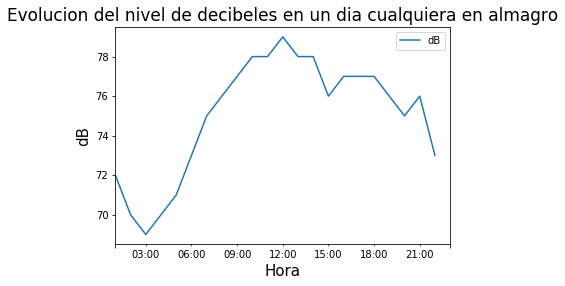

In [75]:
#Convierto la fecha a un formato mas practico
contaminacion_sonora_barrios['FECHA'] = pd.to_datetime(contaminacion_sonora_barrios['FECHA'], format='%d/%m/%Y %H:%M')
contaminacion_almagro = contaminacion_sonora_barrios[contaminacion_sonora_barrios['BARRIO'] == 'Almagro']
contaminacion_almagro = contaminacion_almagro[['FECHA','dB']]  
#Me quedo con un dia cualquiera, por ejemplo, el 31 de Julio
contaminacion_almagro = contaminacion_almagro[(contaminacion_almagro['FECHA'] > '31-07-2013 00:00') &
                                              (contaminacion_almagro['FECHA'] < '31-07-2013 23:59')]
contaminacion_almagro.drop_duplicates(inplace=True)
contaminacion_almagro = contaminacion_almagro.groupby('FECHA', as_index=False).mean()
plot = contaminacion_almagro.plot(x='FECHA', y="dB")
plot.set_title('Evolucion del nivel de decibeles en un dia cualquiera en almagro', fontsize = 17)
plot.set_xlabel("Hora", fontsize = 15)
plot.set_ylabel("dB", fontsize = 15)

### Para Nueva Pompeya

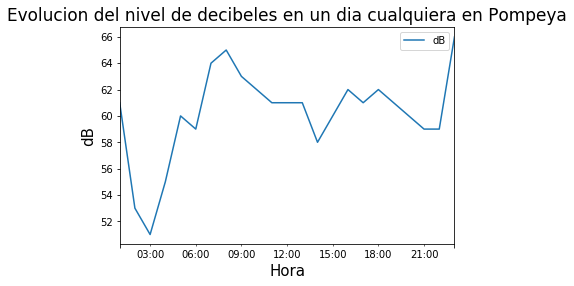

In [76]:
contaminacion_pompeya = contaminacion_sonora_barrios[contaminacion_sonora_barrios['BARRIO'] == 'Nueva Pompeya']
contaminacion_pompeya = contaminacion_pompeya[['FECHA','dB']]  
#Me quedo con un dia cualquiera, por ejemplo, el 31 de Julio
contaminacion_pompeya = contaminacion_pompeya[(contaminacion_pompeya['FECHA'] > '01-01-2013 00:00') &
                                              (contaminacion_pompeya['FECHA'] < '01-01-2013 23:59')]
contaminacion_pompeya.drop_duplicates(inplace=True)
contaminacion_pompeya = contaminacion_pompeya.groupby('FECHA', as_index=False).mean()
plot = contaminacion_pompeya.plot(x='FECHA', y="dB")
plot.set_title('Evolucion del nivel de decibeles en un dia cualquiera en Pompeya', fontsize = 17)
plot.set_xlabel("Hora", fontsize = 15)
plot.set_ylabel("dB", fontsize = 15)

In [77]:
#Agrupo por barrios
contaminacion_promedio =  contaminacion_sonora_barrios.groupby('BARRIO').mean()
contaminacion_promedio =  contaminacion_promedio.sort_values(by='dB', ascending=False)
dB_promedio = contaminacion_promedio['dB']

#### Visualizamos que barrios tienen (en promedio) mayor contaminacion sonora

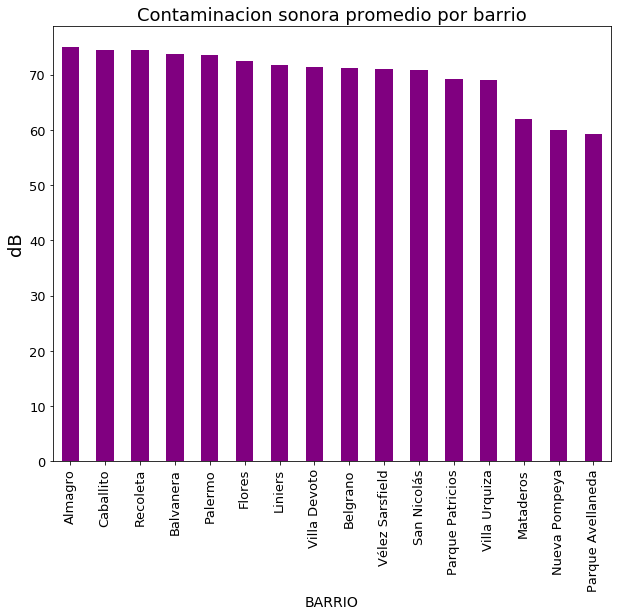

In [78]:
%matplotlib inline
plot= dB_promedio.plot(kind = 'bar', title = 'Contaminacion promedio barrio', figsize=(10,8), color='purple' ,fontsize=13)
plot.set_title('Contaminacion sonora promedio por barrio', fontsize=18);
plot.set_xlabel('BARRIO', fontsize=14);
plot.set_ylabel('dB', fontsize=18);

In [79]:
dB_promedio_index = dB_promedio.reset_index()
promedio_por_barrios_index = promedio_por_barrios.reset_index()
#Ahora hago un merge de los datos de contaminacion y precio por barri
precios_y_contaminacion = pd.merge(dB_promedio_index,propiedades_barrios,on='BARRIO', how = 'inner')
precios_y_contaminacion =  precios_y_contaminacion[['BARRIO','dB','Precio_m2(usd)']]
precios_y_contaminacion.head(10)

BARRIO         dB  Precio_m2(usd)
0  Almagro  74.956522     1723.076923
1  Almagro  74.956522     1590.789474
2  Almagro  74.956522     1934.210526
3  Almagro  74.956522     1250.000000
4  Almagro  74.956522      793.650794
5  Almagro  74.956522     1169.354839
6  Almagro  74.956522     1945.945946
7  Almagro  74.956522     1428.571429
8  Almagro  74.956522     1187.500000
9  Almagro  74.956522      837.209302

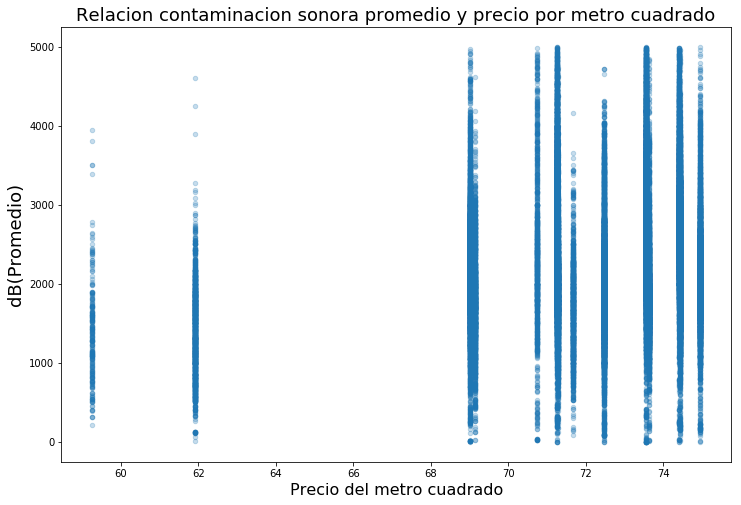

In [117]:
#Hago un scatter plot para ver si hay alguna tendencia que sugiera que hay relacion entre las magnitudes
precios_y_contaminacion = precios_y_contaminacion[precios_y_contaminacion['Precio_m2(usd)']<5000]
plot= precios_y_contaminacion.plot.scatter('dB','Precio_m2(usd)',alpha=0.25,figsize=(12,8));
plot.set_title('Relacion contaminacion sonora promedio y precio por metro cuadrado', fontsize=18);
plot.set_xlabel('Precio del metro cuadrado', fontsize=16);
plot.set_ylabel('dB(Promedio)', fontsize=18);

### Viendo la grafica, no hay una relacion en lo absoluto que indique que properati tiene en cuenta este factor a la hora de darle un valor a la propiedad

## 7- Comparación de precio de propiedades con otras variables económicas
Analizar la variación de los precios de propiedades en comparación a algunas variables económicas, para desprender conclusiones como:
- ¿Podemos asociar el valor del dólar a los precios de las propiedades?
- ¿Podemos asociar la inflación del peso a los precios de las propiedades?
- ¿Podemos asociar el valor del salario mínimo a los precios de las propiedades?
- ¿Qué puede decirse sobre la “accesibilidad” a la compra de propiedades?

### 7.1 - Vs Dólar

In [34]:
propertiesEconomicAnalysis = pd.read_csv('datos_procesados.csv')

#### Nos quedamos con datos bajo el percentil 95 para eliminar ruido

In [35]:
propertiesEconomicAnalysis = propertiesEconomicAnalysis.loc[propertiesEconomicAnalysis.price_per_m2 < propertiesEconomicAnalysis.price_per_m2.quantile(0.85), :]

In [36]:
propertiesEconomicAnalysis['created_on'] = pd.to_datetime(propertiesEconomicAnalysis['created_on'], format = "%Y-%m-%d")
propertiesEconomicAnalysis['year_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: x.year)
propertiesEconomicAnalysis['month_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: x.month)
propertiesEconomicAnalysis['month_year_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: str(x.month) + '-' + str(x.year))

#### ¿Podemos asociar el valor del dólar a los precios de las propiedades?

Normalizamos los valores del metro cuadrado y del dolar, y comparamos su variación.

In [37]:
dolarEvolution = pd.read_csv('data/economic/dolar-daily.csv')
dolarEvolution = dolarEvolution.loc[:,['date', 'open']]

In [38]:
#Normalizamos valor del dolar
max_value = dolarEvolution['open'].max()
min_value = dolarEvolution['open'].min()
normalized = (dolarEvolution['open'] - min_value) / (max_value - min_value)

In [39]:
dolarEvolution['normalized'] = normalized

In [40]:
propertiesNormDf = propertiesEconomicAnalysis.loc[:,['created_on', 'year_created', 'month_created', 'month_year_created', 'price_usd_per_m2', 'price_per_m2']]

In [41]:
#Obtengo columna de precios en pesos normalizada
max_value = propertiesNormDf['price_per_m2'].max()
min_value = propertiesNormDf['price_per_m2'].min()
propertiesPriceNormalized = (propertiesNormDf['price_per_m2'] - min_value) / (max_value - min_value)
propertiesNormDf['price_m2_normalized'] = propertiesPriceNormalized

In [42]:
#Obtengo columna de precios en dolares normalizada
max_value = propertiesNormDf['price_usd_per_m2'].max()
min_value = propertiesNormDf['price_usd_per_m2'].min()
propertiesPriceNormalized = (propertiesNormDf['price_usd_per_m2'] - min_value) / (max_value - min_value)
propertiesNormDf['price_usd_m2_normalized'] = propertiesPriceNormalized

In [43]:
dolarEvolution['date'] = pd.to_datetime(dolarEvolution['date'], format = "%d.%m.%Y")
dolarEvolution['year-month'] = dolarEvolution['date'].map(lambda x: str(x.month) + '-' + str(x.year))
dolarEvolution['year'] = dolarEvolution['date'].map(lambda x: x.year)
dolarEvolution['month'] = dolarEvolution['date'].map(lambda x: x.month)

In [44]:
dolarPriceByMonth = (dolarEvolution.groupby('year-month').mean().reset_index()).sort_values(by=['year','month'])
dolarPriceByMonth = dolarPriceByMonth.loc[:,['year-month', 'normalized']].rename(columns={'normalized':'value'})
dolarPriceByMonth.rename(columns={'year-month':'Mes', 'value':'Evolucion Dolar'}, inplace=True)

In [45]:
propertiesPriceGroupedByMonth = (propertiesNormDf.groupby(['month_year_created']).mean().reset_index()).loc[:,['month_created', 'year_created', 'month_year_created', 'price_m2_normalized']].sort_values(by=['year_created', 'month_created'])
propertiesPriceGroupedByMonth = propertiesPriceGroupedByMonth.loc[:, ['month_year_created', 'price_m2_normalized']]
propertiesPriceGroupedByMonth.rename(columns={'month_year_created':'Mes', 'price_m2_normalized':'Evolucion $/m2'}, inplace=True)

In [46]:
propertiesPriceUSDGroupedByMonth = (propertiesNormDf.groupby(['month_year_created']).mean().reset_index()).loc[:,['month_created', 'year_created', 'month_year_created', 'price_usd_m2_normalized']].sort_values(by=['year_created', 'month_created'])
propertiesPriceUSDGroupedByMonth = propertiesPriceUSDGroupedByMonth.loc[:, ['month_year_created', 'price_usd_m2_normalized']]
propertiesPriceUSDGroupedByMonth.rename(columns={'month_year_created':'Mes', 'price_usd_m2_normalized':'Evolucion USD/m2'}, inplace=True)

In [47]:
propertiesAndDolar = pd.merge(dolarPriceByMonth, propertiesPriceGroupedByMonth, how='inner', on='Mes')
propertiesAndDolar = pd.merge(propertiesAndDolar, propertiesPriceUSDGroupedByMonth, how='inner', on='Mes')

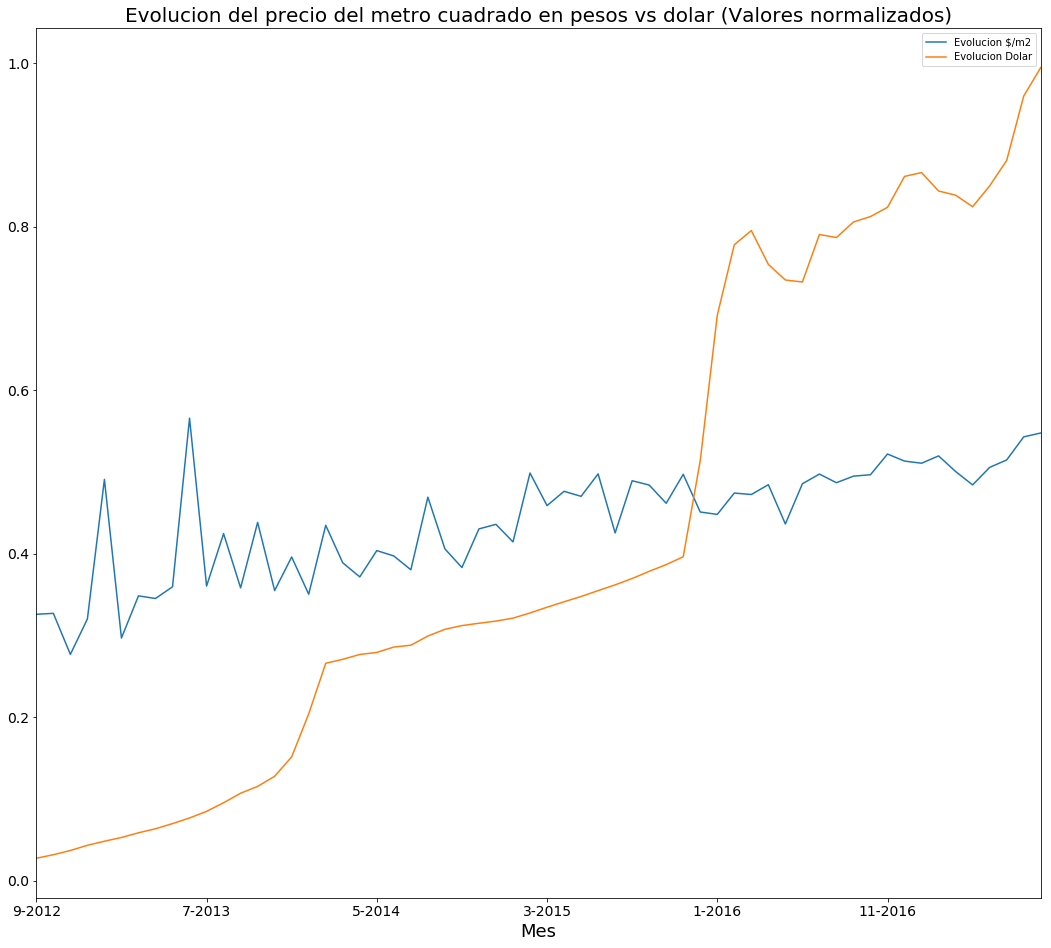

In [57]:
propertiesAndDolar.plot(x="Mes", y=["Evolucion $/m2", "Evolucion Dolar"],figsize=(18,16), fontsize= 14)
plt.title('Evolucion del precio del metro cuadrado en pesos vs dolar (Valores normalizados)',fontsize=20)
plt.xlabel('Mes',fontsize=18)

#### ¿Podemos asociar el valor del salario mínimo a los precios de las propiedades?

Normalizamos los valores del metro cuadrado y del salario, y comparamos su variación.

In [58]:
salaryEvolution = pd.read_csv('data/economic/salario-minimo.csv')

In [59]:
max_value = salaryEvolution['salario_minimo'].max()
min_value = salaryEvolution['salario_minimo'].min()
normalized = (salaryEvolution['salario_minimo'] - min_value) / (max_value - min_value)

In [60]:
salaryEvolution['normalized'] = normalized

In [61]:
salaryEvolution['mes'] = pd.to_datetime(salaryEvolution['mes'], format = "%m-%Y")
salaryEvolution['year-month'] = salaryEvolution['mes'].map(lambda x: str(x.month) + '-' + str(x.year))
salaryEvolution['year'] = salaryEvolution['mes'].map(lambda x: x.year)
salaryEvolution['month'] = salaryEvolution['mes'].map(lambda x: x.month)

In [62]:
salaryByMonth = (salaryEvolution.groupby('year-month').mean().reset_index()).sort_values(by=['year','month'])
salaryByMonth = salaryByMonth.loc[:,['year-month', 'normalized']].rename(columns={'normalized':'value'})
salaryByMonth.rename(columns={'year-month':'Mes', 'value':'Evolucion salario minimo'}, inplace=True)

In [63]:
propertiesAndSalary = pd.merge(salaryByMonth, propertiesPriceGroupedByMonth, how='inner', on='Mes')

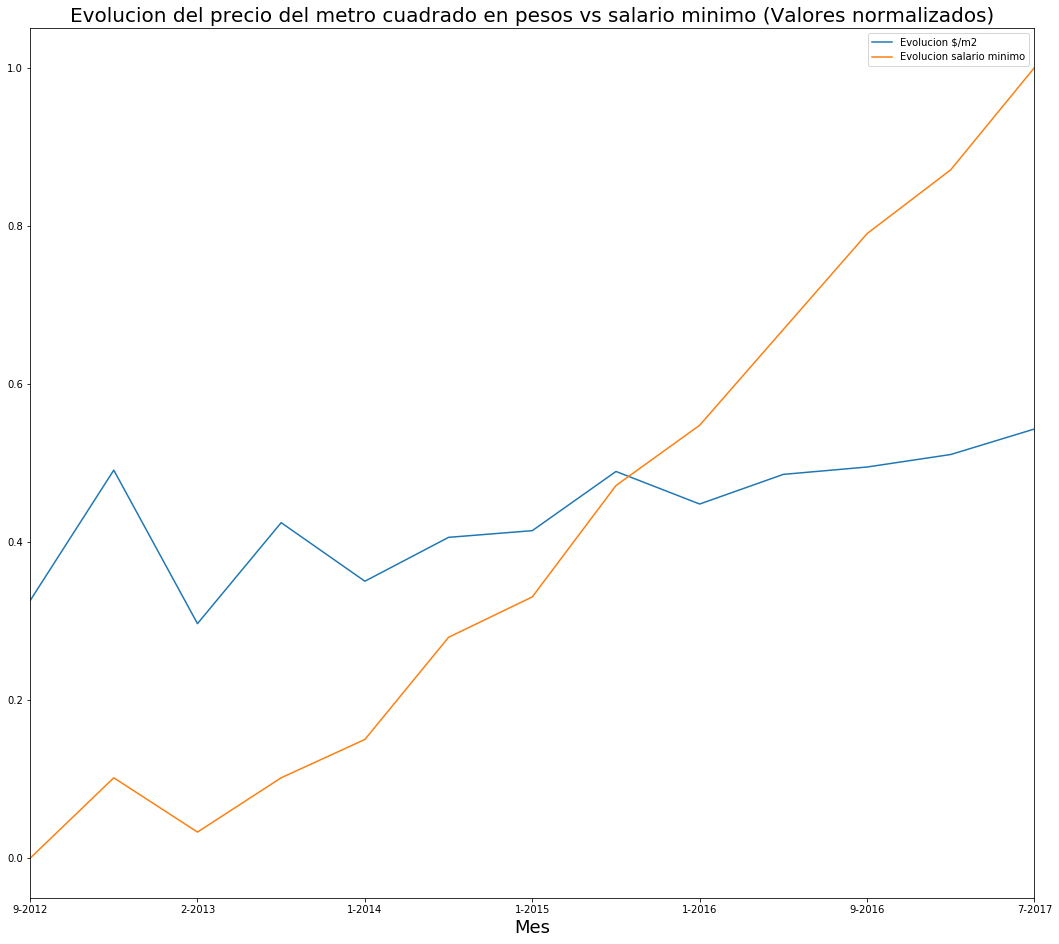

In [66]:
propertiesAndSalary.plot(x="Mes", y=["Evolucion $/m2", "Evolucion salario minimo"], figsize= (18,16))
plt.title('Evolucion del precio del metro cuadrado en pesos vs salario minimo (Valores normalizados)', fontsize= 20)
plt.xlabel('Mes',fontsize=18)

#### ¿Podemos asociar la inflación a los precios de las propiedades?

In [71]:
inflationEvolution = pd.read_csv('data/economic/inflacion-argentina.csv')

In [72]:
inflationEvolution['FECHA'] = pd.to_datetime(inflationEvolution['FECHA'], format = "%d/%m/%Y")

In [73]:
inflationEvolution['year-month'] = inflationEvolution['FECHA'].map(lambda x: str(x.month) + '-' + str(x.year))
inflationEvolution['year'] = inflationEvolution['FECHA'].map(lambda x: x.year)
inflationEvolution['month'] = inflationEvolution['FECHA'].map(lambda x: x.month)

In [74]:
#Calculo variacion mes a mes de los precios del metro cuadrado
s = pd.Series([propertiesPriceGroupedByMonth.iloc[0]['Evolucion $/m2']])
s = s.append(propertiesPriceGroupedByMonth['Evolucion $/m2'])
sdf = s.reset_index()
propertiesPriceGroupedByMonth.reset_index(inplace=True)
propertiesPriceGroupedByMonth['previous'] = sdf[0]

propertiesPriceGroupedByMonth['var'] = propertiesPriceGroupedByMonth.apply(lambda x : (x['Evolucion $/m2']-x['previous'])/x['previous'], axis=1)

In [75]:
propertiesAndInflation = pd.merge(propertiesPriceGroupedByMonth, inflationEvolution, how='inner', left_on='Mes', right_on='year-month')

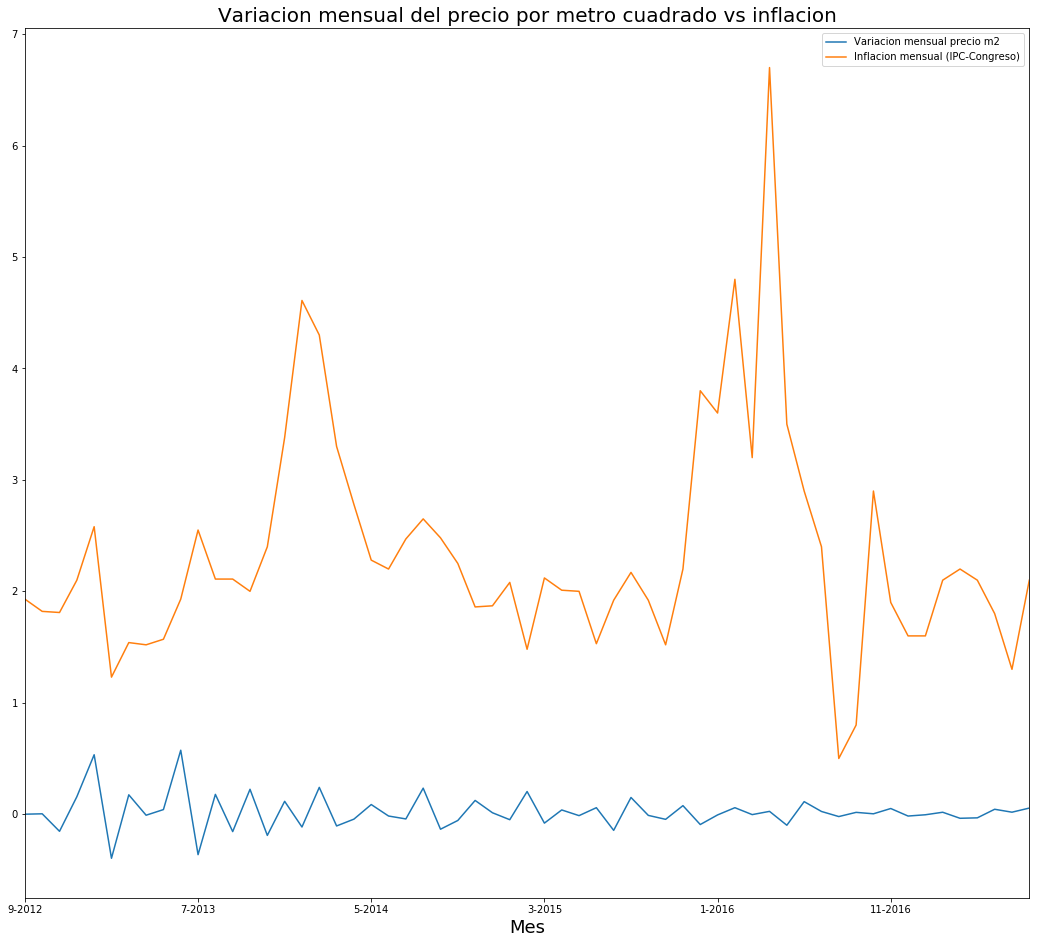

In [77]:
propertiesAndInflation.rename(columns={'var':'Variacion mensual precio m2', 'IPC-CONGRESO':'Inflacion mensual (IPC-Congreso)'}, inplace=True)
propertiesAndInflation.plot(x="Mes", y=["Variacion mensual precio m2", "Inflacion mensual (IPC-Congreso)"],figsize=(18,16))
plt.title('Variacion mensual del precio por metro cuadrado vs inflacion',fontsize=20)
plt.xlabel('Mes',fontsize=18)


### 8- Análisis por piso
- 8.1 - Análisis de relación entre precio y piso

La hipótesis de este análisis es que los primeros dos pisos de un apartamento se cotizan a precios más bajos. Esto se debe a mayor riesgo de robo al estar cerca del nivel de calle.

Adicionalmente, se espera que entre más alto el piso a partir de un cierto pico, la cotización empiece a bajar, ya que entre más alto está el departamento, más largos serán los tiempos de espera en el ascensor y escaleras.

In [78]:
data = pd.read_csv('datos_procesados.csv').copy()

#Selecciono datos que me interesan (estado, tipo de propiedad, superficie, precio por m2, y piso)
data2 = data[['state_name','property_type','surface_covered_in_m2','price_per_m2','floor']]

#Elimino NAs
data2.dropna(inplace=True)

#Selecciono sólo los apartamentos 
data3 = data2[data2['property_type']== 'apartment']

#Agrego una columna con el precio de la propiedad
data3['precio_propiedad'] = data3['surface_covered_in_m2']*data3['price_per_m2']

#Separo los datos en Capital Federal y Gran Buenos Aires
dataCF = data3[data3['state_name']== 'Capital Federal']
dataGBA = data3.loc[data3.state_name.str.contains('G.B.A.'),:]

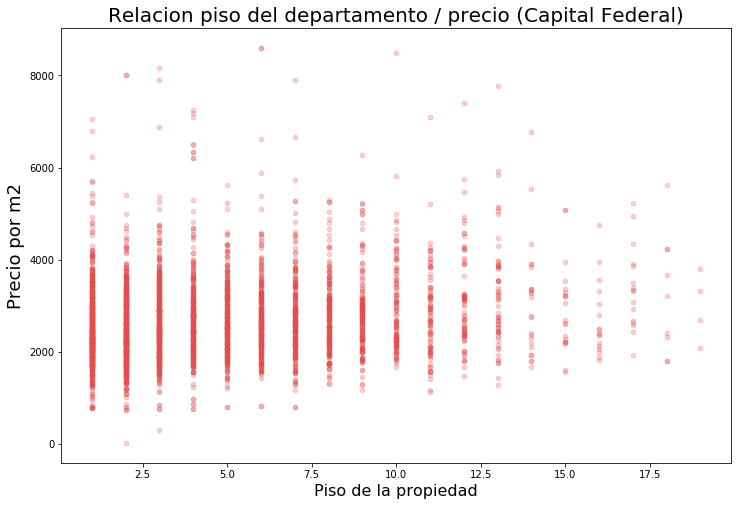

In [85]:
#Hago un scatterplot con el precio de propiedades por piso en Capital Federal

dataCF1 = dataCF[dataCF['price_per_m2']< 10000]
dataCF2 = dataCF1[dataCF1['floor']< 20]

plot = dataCF2.plot.scatter('floor', 'price_per_m2',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3))
plot.set_title('Relacion piso del departamento / precio (Capital Federal)', fontsize=20)
plot.set_xlabel('Piso de la propiedad', fontsize=16)
plot.set_ylabel('Precio por m2', fontsize=18)



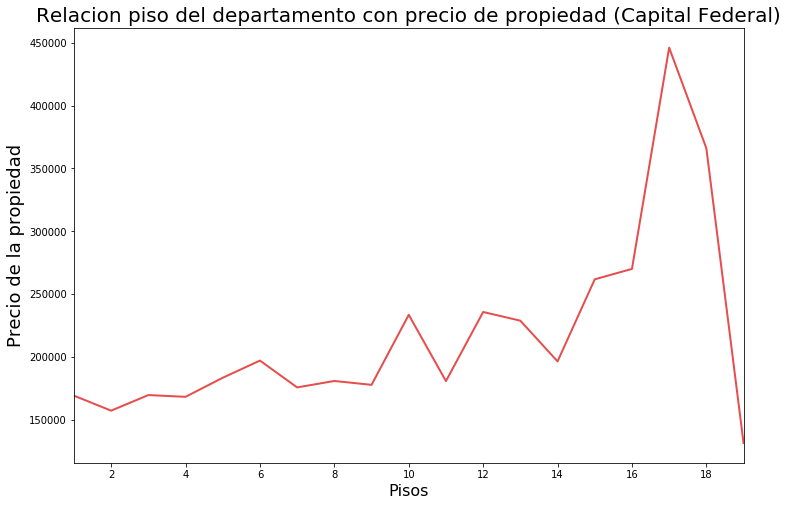

In [86]:
#Grafico el promedio de precio de propiedades por piso en Capital Federal
plot =dataCF2.groupby('floor').mean().loc[:,'precio_propiedad'].plot(linewidth=2,figsize=(12,8),color=(0.9,0.3,0.3))
plot.set_title('Relacion piso del departamento con precio de propiedad (Capital Federal)', fontsize=20)
plot.set_xlabel('Pisos', fontsize=16)
plot.set_ylabel('Precio de la propiedad', fontsize=18)

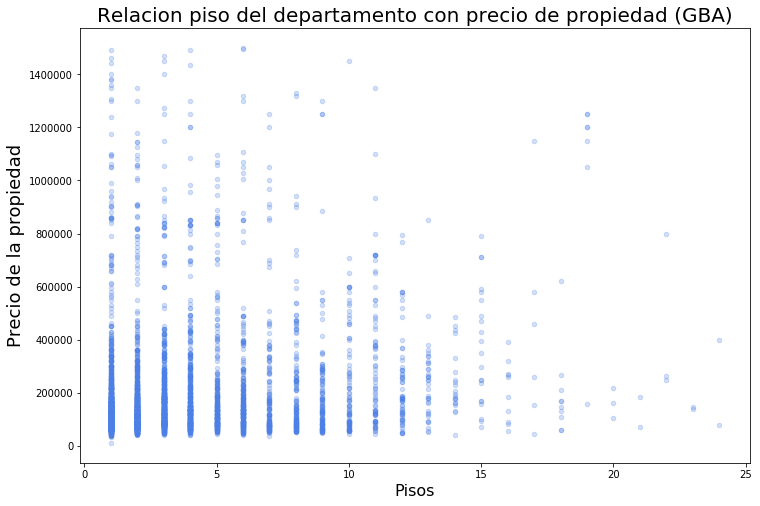

In [87]:
#Hago un scatterplot con el precio de propiedades por piso en Gran Buenos Aires

dataGBA1 = dataGBA[dataGBA['precio_propiedad']< 1500000]
dataGBA2 = dataGBA1[dataGBA1['floor']< 30]

plot = dataGBA2.plot.scatter('floor', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.3,0.5,0.9))
plot.set_title('Relacion piso del departamento con precio de propiedad (GBA)', fontsize=20)
plot.set_xlabel('Pisos', fontsize=16)
plot.set_ylabel('Precio de la propiedad', fontsize=18)


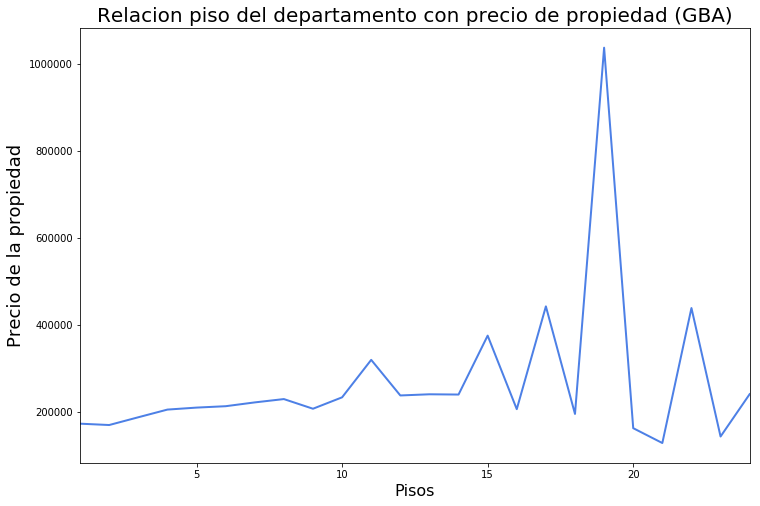

In [88]:
#Grafico el promedio de precio de propiedades por piso en Gran Buenos Aires
plot = dataGBA2.groupby('floor').mean().loc[:,'precio_propiedad'].plot(linewidth=2,figsize=(12,8),color=(0.3,0.5,0.9))
plot.set_title('Relacion piso del departamento con precio de propiedad (GBA)', fontsize=20)
plot.set_xlabel('Pisos', fontsize=16)
plot.set_ylabel('Precio de la propiedad', fontsize=18)

#### Concluimos que tanto para Capital Federal como para Gran Buenos Aires, los primeros pisos se cotizan más barato.
#### Después de cierto punto la cotización se vuelve irregular, pero tiende a reducirse.